In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
# pd.set_option('display.max_rows', None)
import numpy as np

In [2]:
baseline = pd.read_csv('../main/log/feature_selection20241017.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
baseline2 = pd.read_csv('../main/log/feature_selection_20241121.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
baseline3 = pd.read_csv('../main/log/feature_selection2_20241203.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

baseline = pd.concat((baseline, baseline2))
baseline = pd.concat((baseline, baseline3))
baseline.reset_index(inplace = True, drop = True)

In [3]:
baseline.tail()

algo experiment  noise dataset  seed  generation  training_fitness  \
3223215  GSGP  add_noise     50    ld50    29         996         898.39801   
3223216  GSGP  add_noise     50    ld50    29         997         898.39801   
3223217  GSGP  add_noise     50    ld50    29         998         898.39801   
3223218  GSGP  add_noise     50    ld50    29         999         898.39801   
3223219  GSGP  add_noise     50    ld50    29        1000         898.39801   

           timing  pop_node_count  test_fitness  elite_size  log  
3223215  0.349366        845591.0   2835.677002        8421    1  
3223216  0.393673        846409.0   2835.677002        8421    1  
3223217  0.348357        847491.0   2835.677002        8421    1  
3223218  0.343157        848232.0   2835.677002        8421    1  
3223219  0.349997        848954.0   2835.677002        8421    1

In [4]:
baseline.algo.unique()

array(['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG',
       'GSGP*ABS'], dtype=object)

In [5]:
data = pd.read_csv('../main/log/feature_selection_20241018.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data2 = pd.read_csv('../main/log/feature_selection_20241028.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data3 = pd.read_csv('../main/log/feature_selection_20241112.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data = pd.concat((data, data2))
data = pd.concat((data, data3))

data4 = pd.read_csv('../main/log/feature_selection_smart2_20241125.csv', names = ["algo", "experiment",  "noise", "metric","dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data4['algo'] = data4['algo'] + '_' + data4['metric']
data4.drop('metric', axis = 1, inplace = True)

data = pd.concat((data, data4.query("noise != 0")))
data.reset_index(inplace = True, drop = True)

baseline = pd.concat((baseline, data4.query("noise == 0")))
baseline.reset_index(inplace = True, drop = True)

baseline.drop_duplicates(subset = ["algo",  "noise","dataset", "seed", "generation"], keep = 'last', inplace = True)

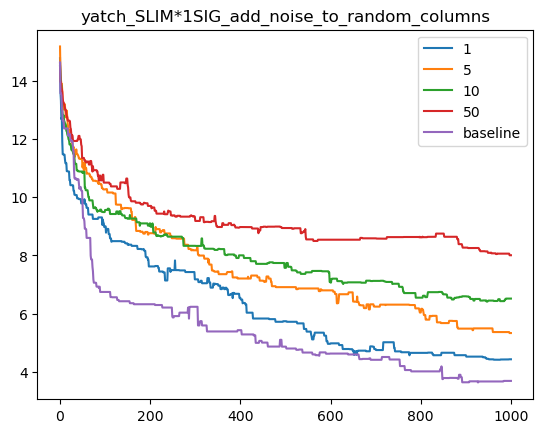

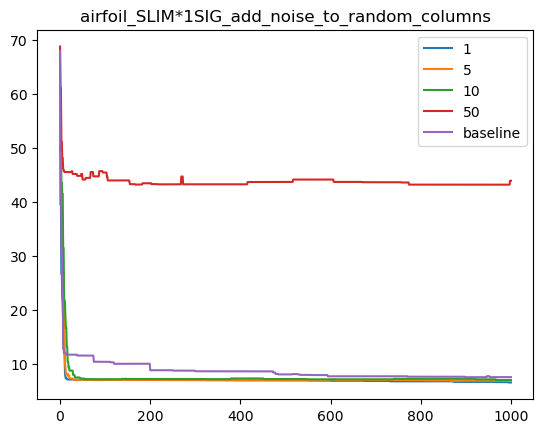

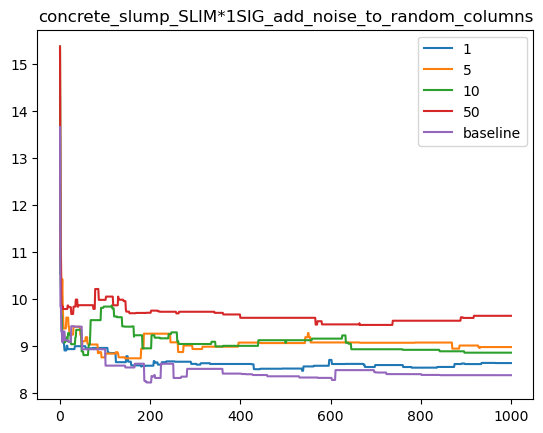

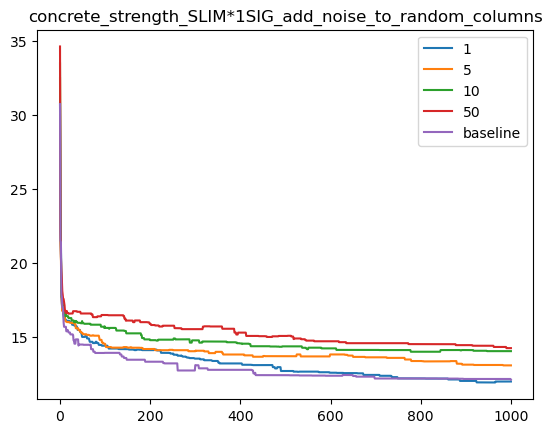

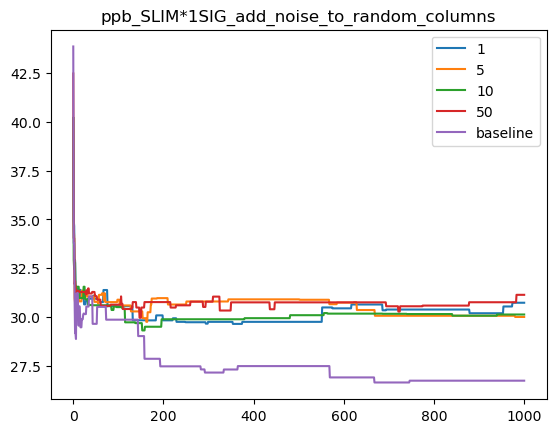

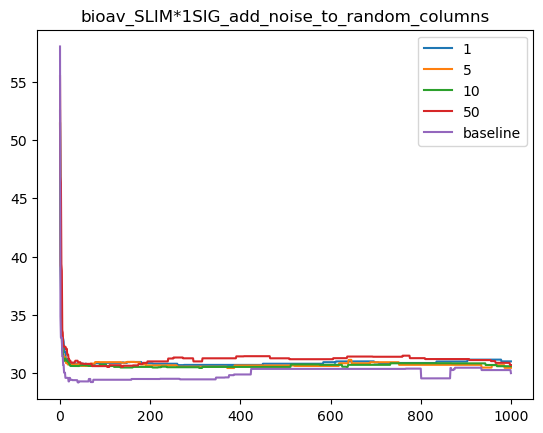

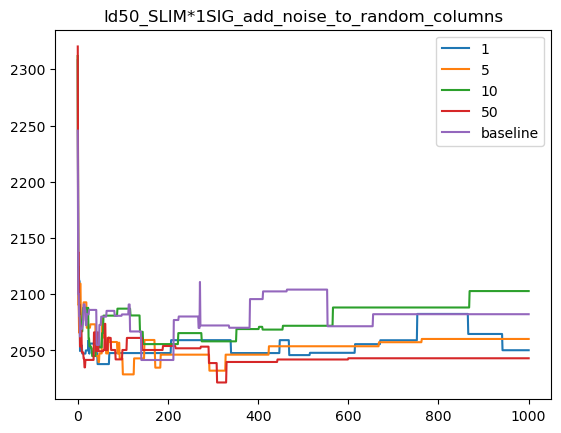

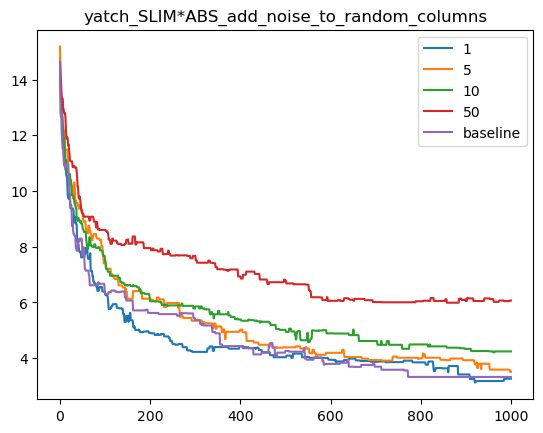

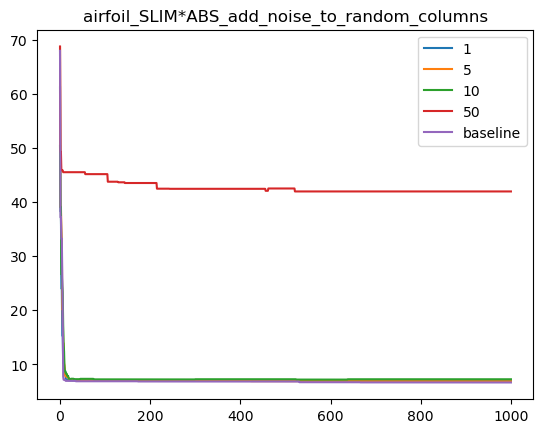

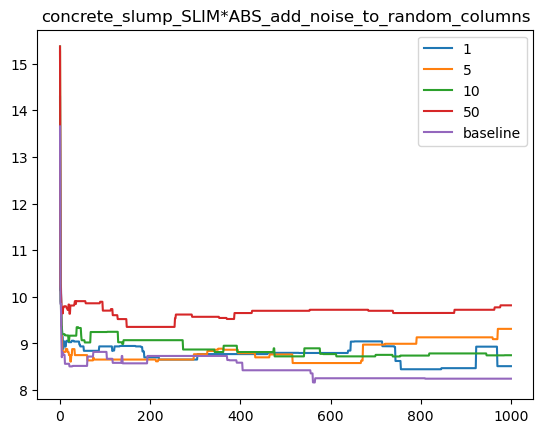

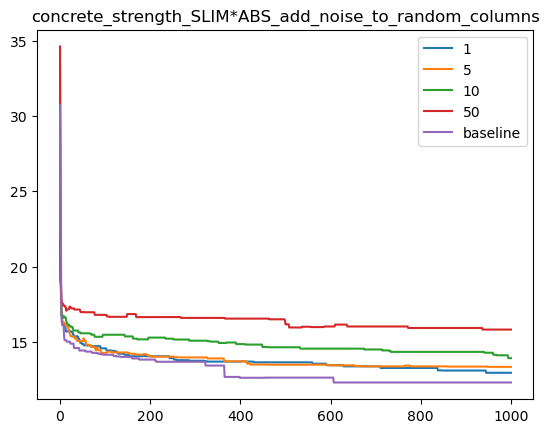

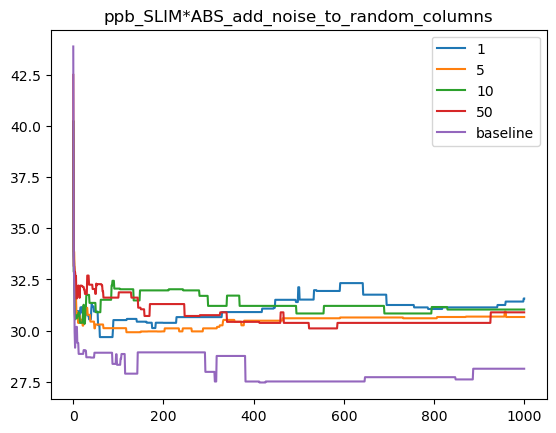

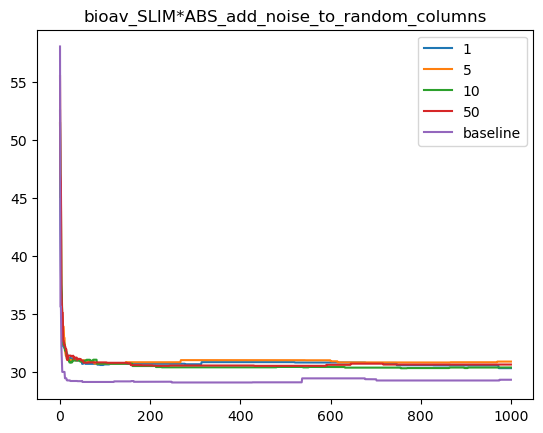

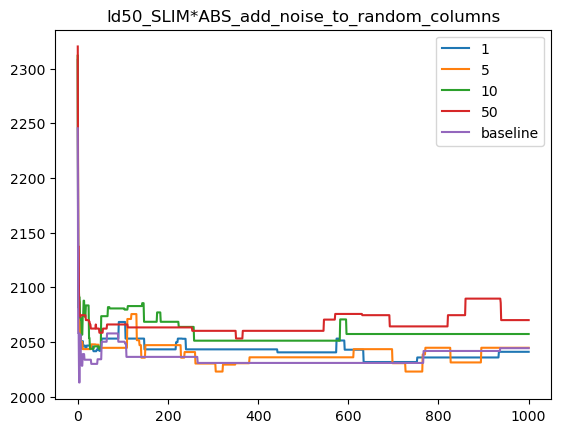

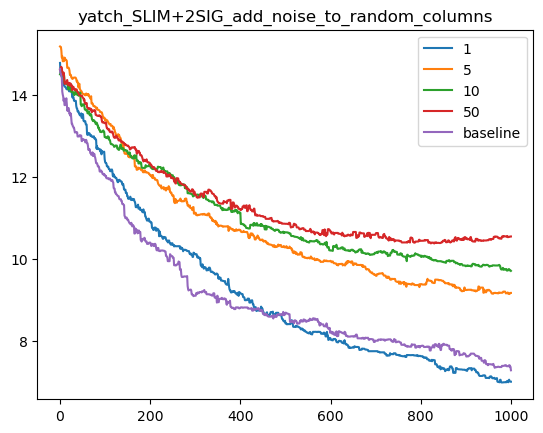

KeyboardInterrupt: 

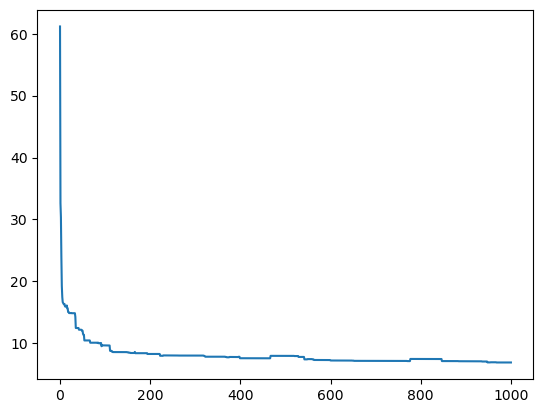

In [47]:
for experiment in data.experiment.unique():
    for algo in data.algo.unique():
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['test_fitness'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [48]:
algo_types =  [['SLIM*1SIG', 'GSGP*1SIG', 'SLIM*1SIG_rmse', 'SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse'], 
              ['SLIM*ABS', 'GSGP*ABS', 'SLIM*ABS_rmse', 'SLIM*ABS_sign', 'SLIM*ABS_sign_rmse'],
              ['SLIM+2SIG', 'GSGP','SLIM+2SIG_rmse','SLIM+2SIG_sign','SLIM+2SIG_sign_rmse']]

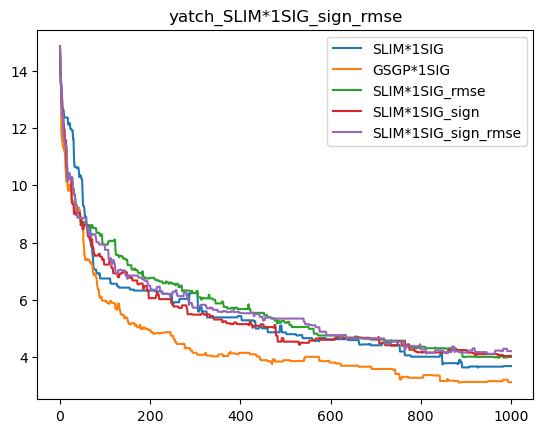

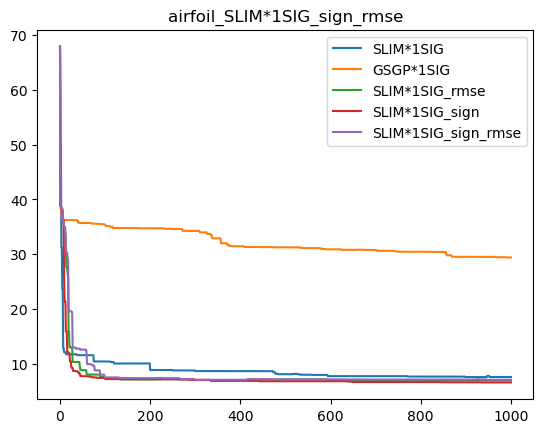

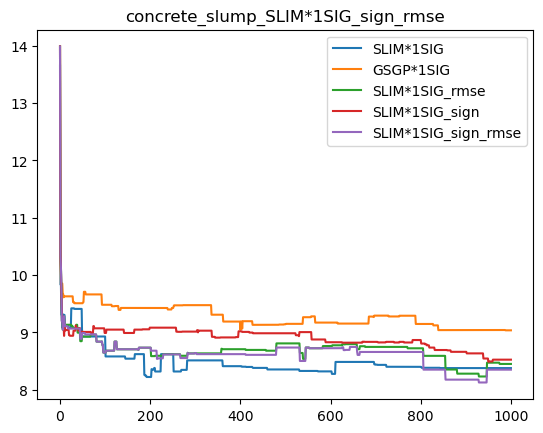

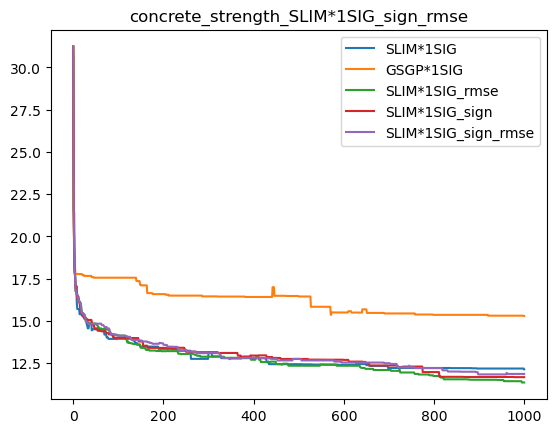

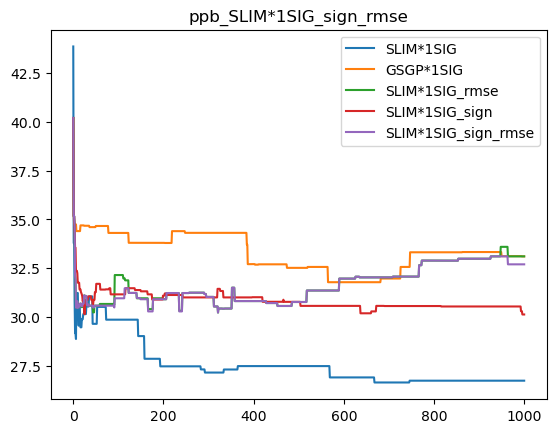

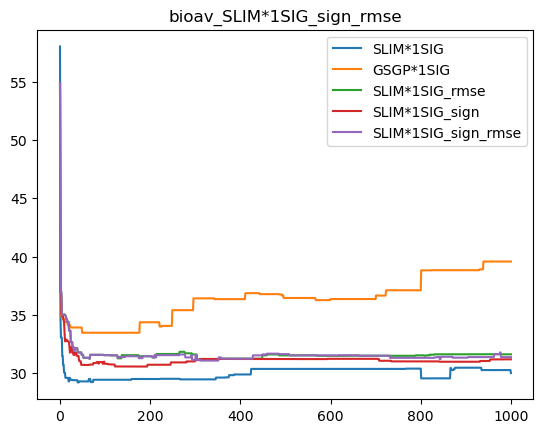

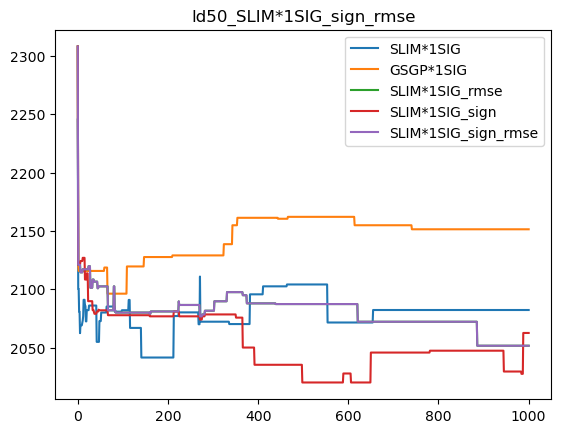

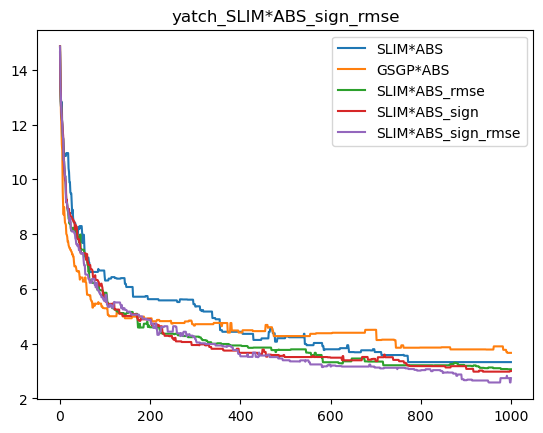

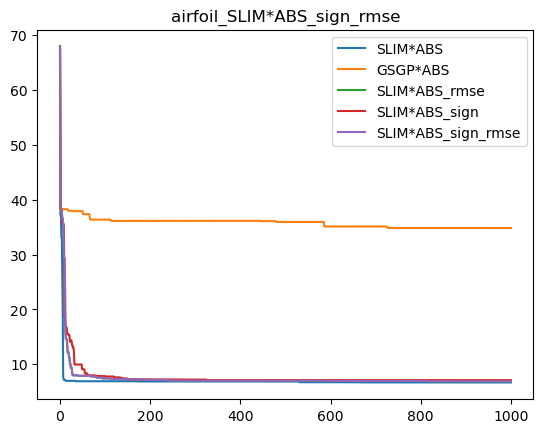

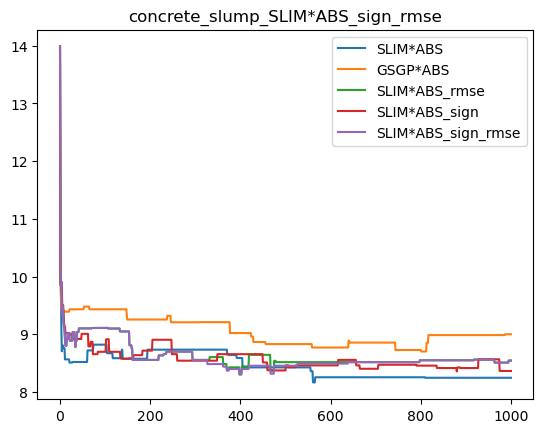

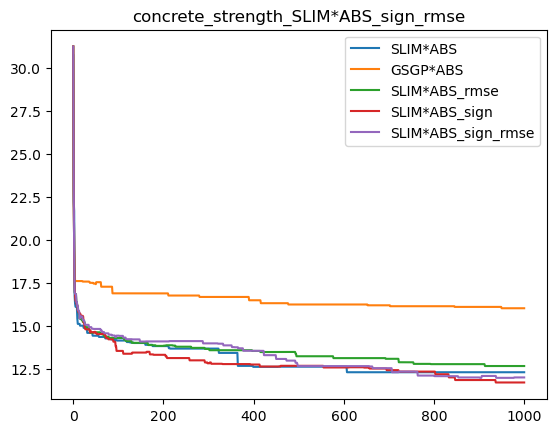

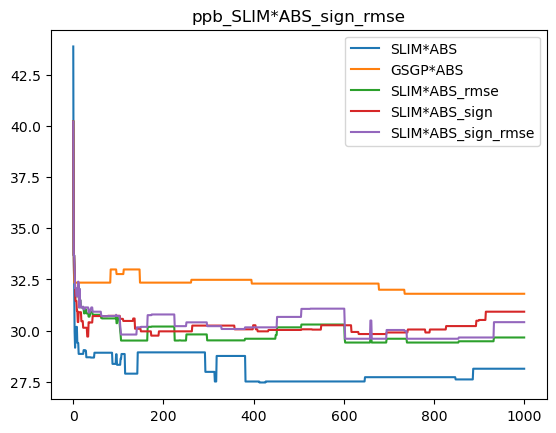

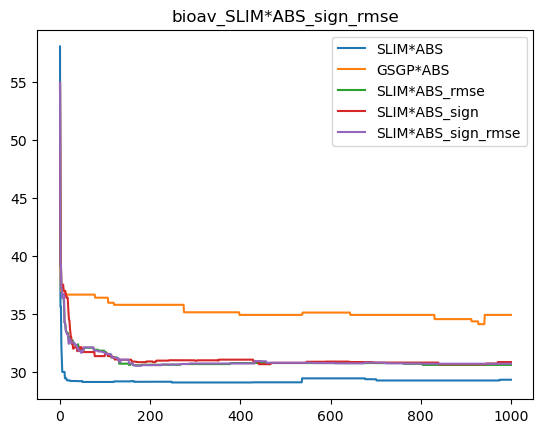

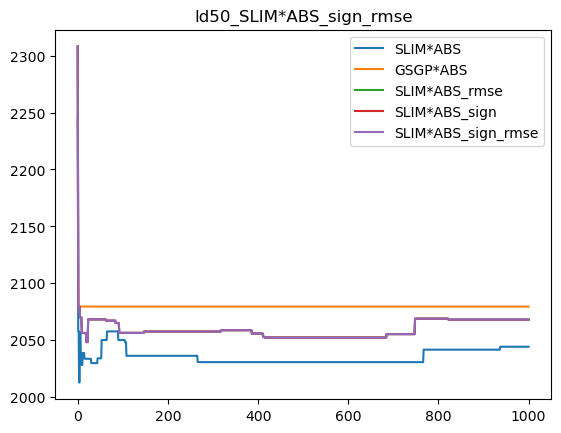

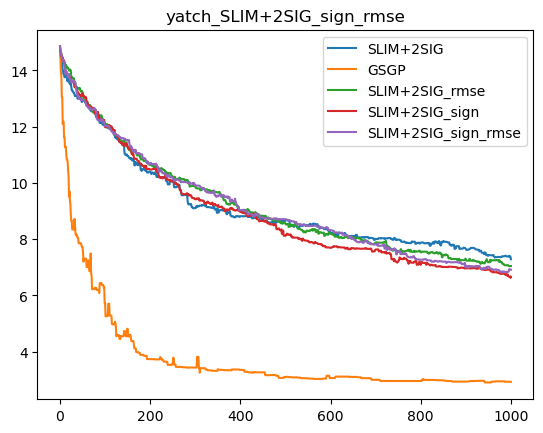

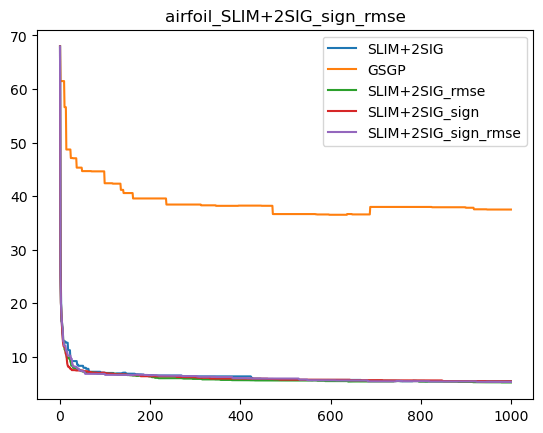

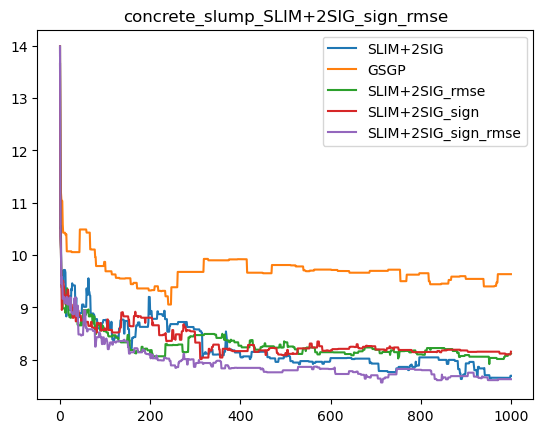

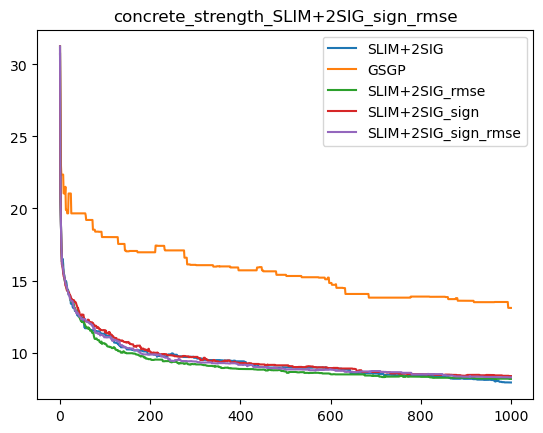

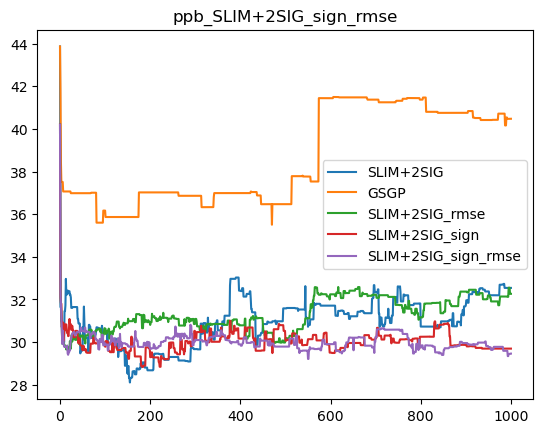

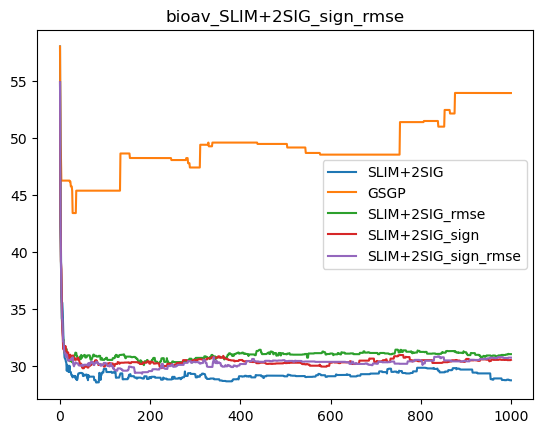

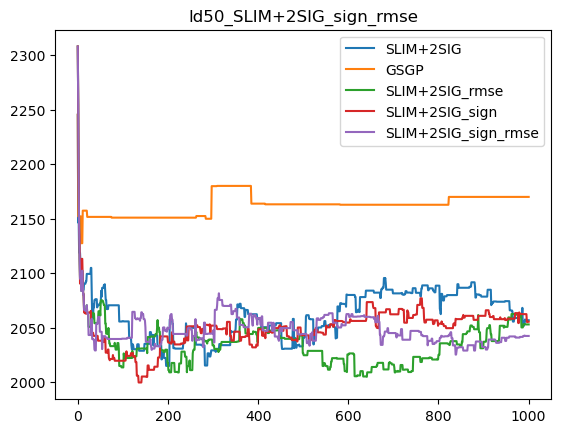

In [49]:
# for experiment in baseline.experiment.unique():
for algo_type in algo_types:
    for datas in baseline.dataset.unique(): 
        for algo in algo_type:
            # for noise in data.noise.unique():
                
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['test_fitness'].values, label = algo)
    
            
            # grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            # plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
        plt.title(f'{datas}_{algo}')
        plt.legend()
        plt.show()

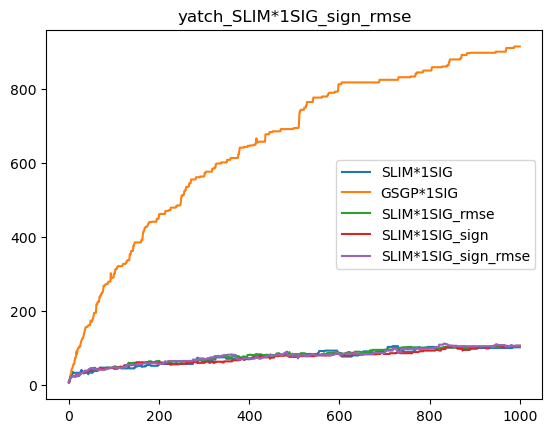

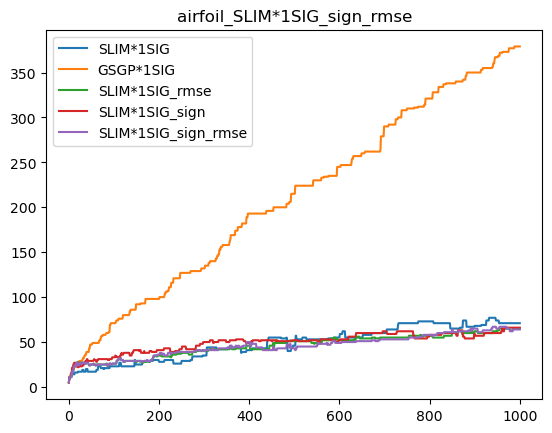

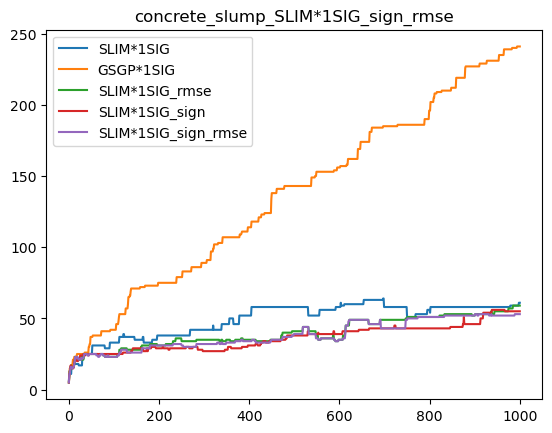

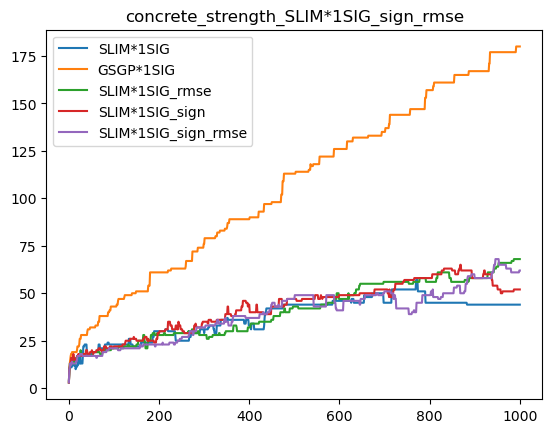

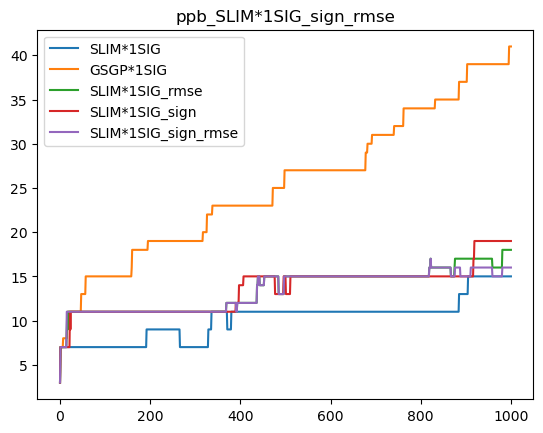

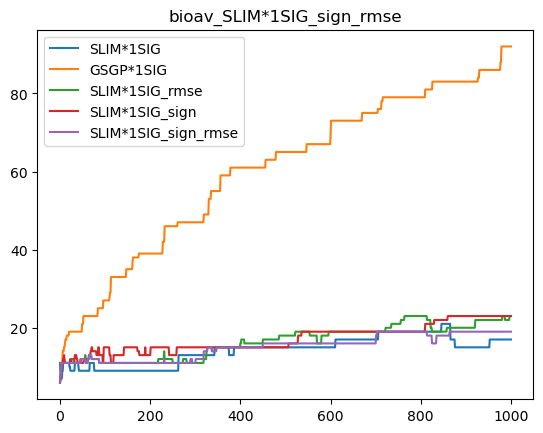

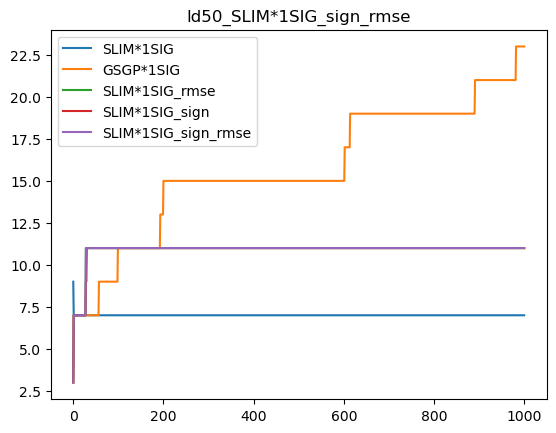

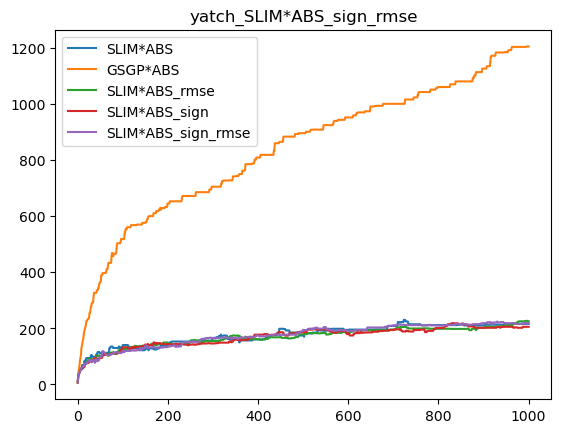

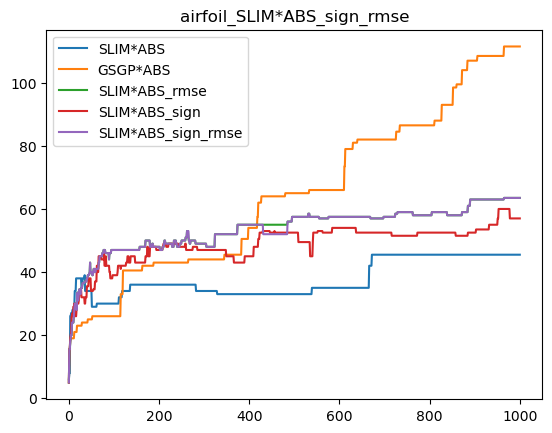

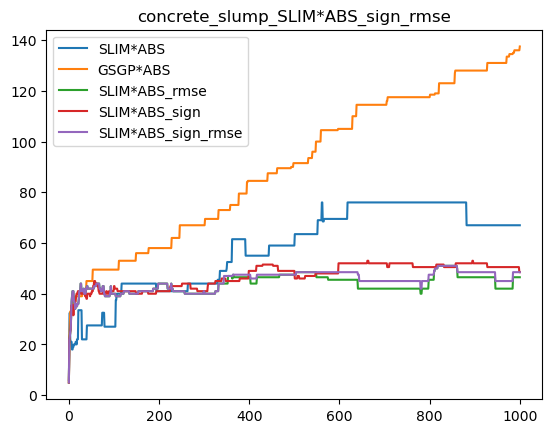

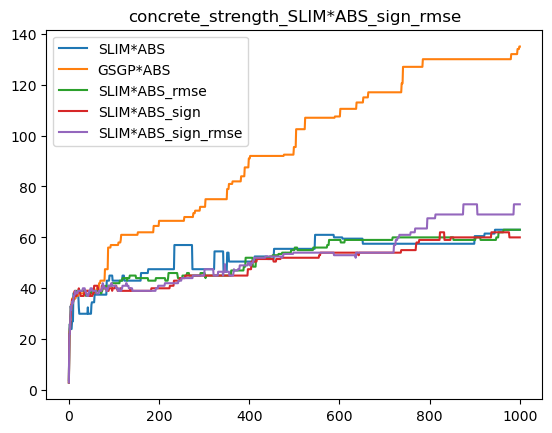

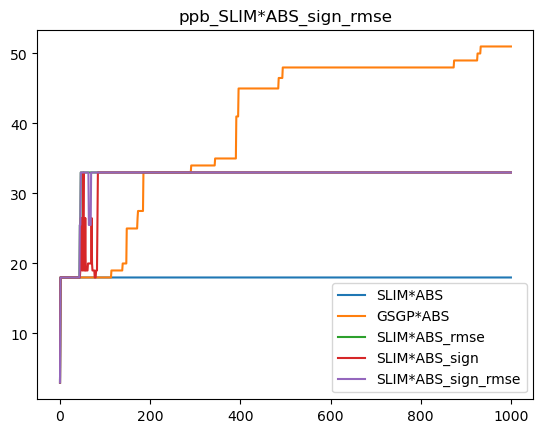

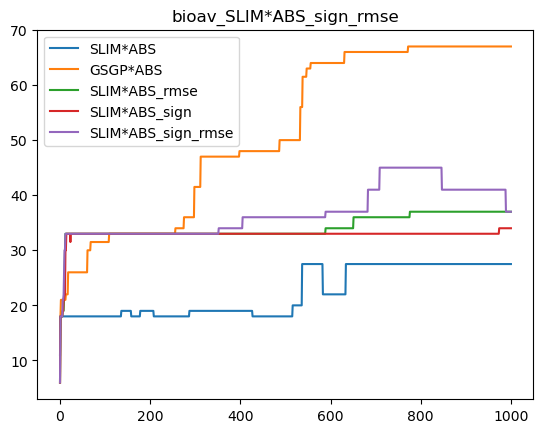

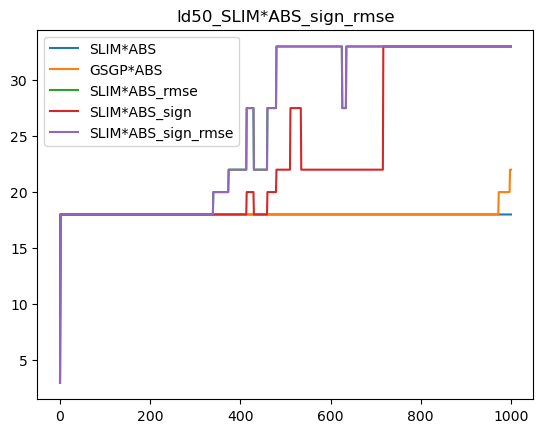

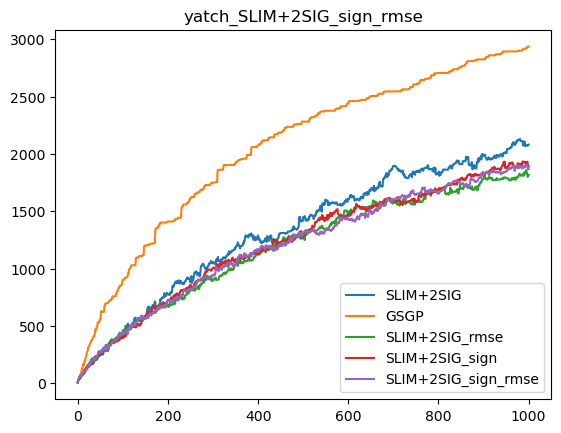

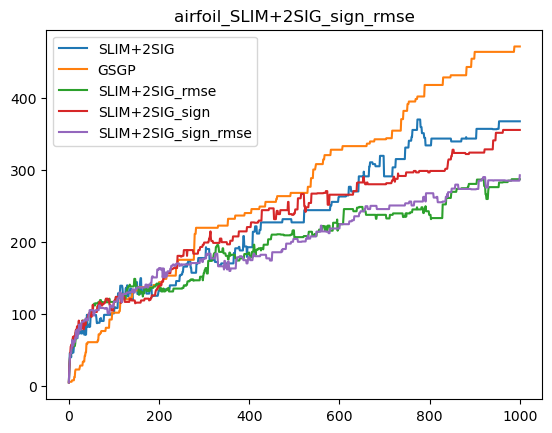

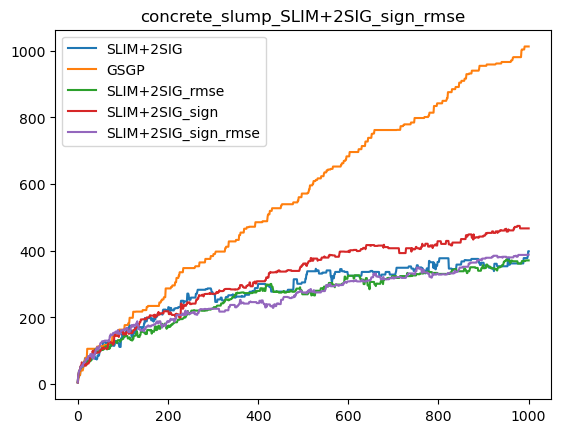

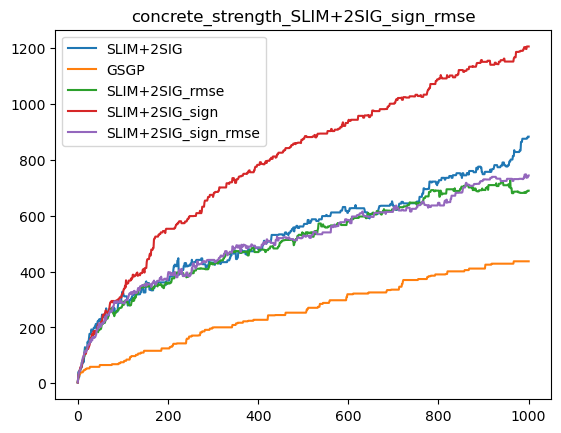

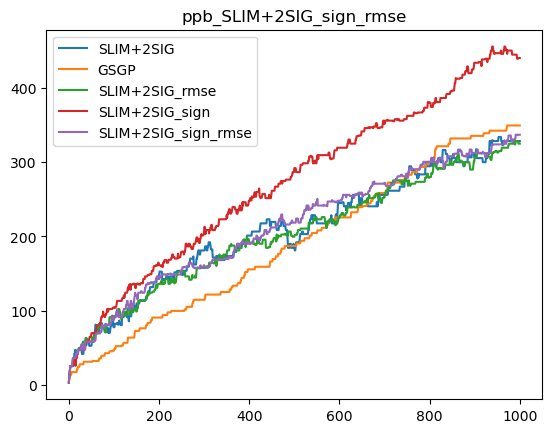

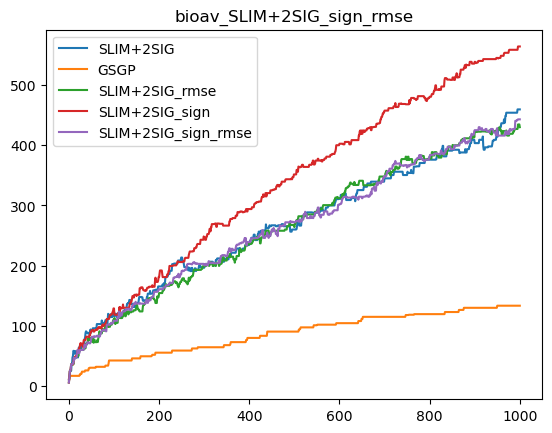

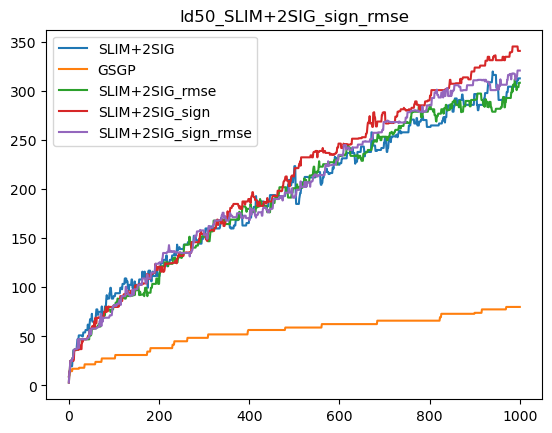

In [50]:
# for experiment in baseline.experiment.unique():
for algo_type in algo_types:
    for datas in baseline.dataset.unique(): 
        for algo in algo_type:
            # for noise in data.noise.unique():
                
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['elite_size'].values, label = algo)
    
            
            # grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            # plt.plot(grouped.index, grouped['test_fitness'].values, label = 'baseline')
    
        plt.title(f'{datas}_{algo}')
        plt.legend()
        plt.show()

In [20]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            print(datas)
            baseline_v = baseline.query("algo == @algo and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                ax = '' if pv > 0.05 else '*'
            
                print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch
1 : 0.31004412387652436
5 : 0.009104586694104593*
10 : 0.015490940482891756*
50 : 0.00010077152813308912*
airfoil
1 : 0.5219695053554594
5 : 0.2291551655222669
10 : 0.08870026815186603
50 : 8.856314370151679e-05*
concrete_slump
1 : 0.48219166095493815
5 : 0.09470997485228519
10 : 0.11471386476194391
50 : 0.09470997485228519
concrete_strength
1 : 0.48219166095493815
5 : 0.04394222286967825*
10 : 0.0023238003463012438*
50 : 5.234536616695991e-05*
ppb
1 : 0.17423795411945142
5 : 0.20586864962849072
10 : 0.11471386476194391
50 : 0.05879775704449843
bioav
1 : 0.2291551655222669
5 : 0.5633701759173014
10 : 0.6732665200106236
50 : 0.9875396431792867
ld50
1 : 0.7906278567101722
5 : 0.6506179356895665
10 : 0.6732665200106236
50 : 0.7194457366855653


SLIM*ABS
yatch
1 : 0.9875396431792867
5 : 0.3733636355831279
10 : 0.09470997485228519
50 : 0.00021448233973810725*
airfoil
1 : 0.2953929127117212
5 : 0.14638597411348
10 : 0.06766474200791676
50 : 0.00010

Count how many times the version with noise has worse performances compared with the baseline

In [19]:
data.algo.unique()

array(['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG',
       'GSGP*ABS', 'SLIM*1SIG_rmse', 'SLIM*ABS_rmse', 'SLIM+2SIG_rmse',
       'SLIM*1SIG_sign', 'SLIM*ABS_sign', 'SLIM+2SIG_sign',
       'SLIM*1SIG_sign_rmse', 'SLIM*ABS_sign_rmse', 'SLIM+2SIG_sign_rmse'],
      dtype=object)

In [27]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Precompute unique values
experiments = data.experiment.unique()
# algorithms = data.algo.unique()
algorithms = [
            'SLIM+2SIG',  'SLIM+2SIG_rmse', 'SLIM+2SIG_sign', 'SLIM+2SIG_sign_rmse',
            'SLIM*1SIG', 'SLIM*1SIG_rmse','SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse',
            'SLIM*ABS', 'SLIM*ABS_rmse','SLIM*ABS_sign','SLIM*ABS_sign_rmse'
]
datasets = data.dataset.unique()
noises = data.noise.unique()

# Pre-filter data
baseline_filtered = baseline.query("generation == 1000")[["algo", "dataset", "test_fitness"]]
data_filtered = data.query("generation == 1000")

# Initialize results
results = []

for experiment in experiments:
    for algo in algorithms:
        algo_results = []
        for datas in datasets:
            count = 0
            if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
                algo_b = algo[:9]
            else:
                algo_b = algo
            if algo_b == 'SLIM*ABS_':
                algo_b  = 'SLIM*ABS'

            # algo_b = 'GSGP' if algo_b == 'SLIM+2SIG' else ( 'GSGP*1SIG' if algo_b == 'SLIM*1SIG' else 'GSGP*ABS') 

            baseline_v = baseline_filtered[
                (baseline_filtered["algo"] == algo_b) & 
                (baseline_filtered["dataset"] == datas)
            ]["test_fitness"].to_numpy()

            for noise in noises:
                data_v = data_filtered[
                    (data_filtered["algo"] == algo) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["test_fitness"].to_numpy()

                if len(baseline_v) > 0 and len(data_v) > 0:  # Avoid empty data
                    pv = mannwhitneyu(baseline_v, data_v)[1]
                    count += 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else 0

            algo_results.append(count)
        results.append((experiment, algo, algo_results))

# Convert to a dictionary of DataFrames
results_dict_2 = {
    experiment: pd.DataFrame(
        {algo: counts for _, algo, counts in results if _ == experiment},
        index=datasets
    ) for experiment in experiments
}


In [28]:
results_dict_2['add_noise_to_random_columns']

SLIM+2SIG  SLIM+2SIG_rmse  SLIM+2SIG_sign  \
yatch                      3               3               3   
airfoil                    4               4               4   
concrete_slump             2               1               1   
concrete_strength          3               4               4   
ppb                        0               0               0   
bioav                      2               1               1   
ld50                       0               0               0   

                   SLIM+2SIG_sign_rmse  SLIM*1SIG  SLIM*1SIG_rmse  \
yatch                                3          3               3   
airfoil                              3          1               3   
concrete_slump                       2          0               0   
concrete_strength                    3          3               3   
ppb                                  0          0               0   
bioav                                0          0               0   
ld50                                 0          0               0   

                   SLIM*1SIG_sign  SLIM*1SIG_sign_rmse  SLIM*ABS  \
yatch                           3                    3         1   
airfoil                         2                    3         1   
concrete_slump                  0                    0         0   
concrete_strength               3                    2         2   
ppb                             1                    0         0   
bioav                           0                    0         0   
ld50                            0                    0         0   

                   SLIM*ABS_rmse  SLIM*ABS_sign  SLIM*ABS_sign_rmse  
yatch                          2              1                   1  
airfoil                        2              2                   2  
concrete_slump                 0              0                   0  
concrete_strength              2              2                   2  
ppb                            1              1                   1  
bioav                          4              3                   4  
ld50                           0              0                   0

In [29]:
results_dict_2['add_noise']

SLIM+2SIG  SLIM+2SIG_rmse  SLIM+2SIG_sign  \
yatch                      4               4               4   
airfoil                    4               4               3   
concrete_slump             3               3               3   
concrete_strength          3               4               4   
ppb                        0               0               0   
bioav                      2               2               1   
ld50                       0               0               0   

                   SLIM+2SIG_sign_rmse  SLIM*1SIG  SLIM*1SIG_rmse  \
yatch                                4          3               4   
airfoil                              3          1               2   
concrete_slump                       3          2               2   
concrete_strength                    4          3               3   
ppb                                  0          0               0   
bioav                                1          0               0   
ld50                                 0          0               0   

                   SLIM*1SIG_sign  SLIM*1SIG_sign_rmse  SLIM*ABS  \
yatch                           4                    3         3   
airfoil                         2                    2         1   
concrete_slump                  3                    2         2   
concrete_strength               3                    3         2   
ppb                             0                    1         0   
bioav                           0                    0         1   
ld50                            0                    0         0   

                   SLIM*ABS_rmse  SLIM*ABS_sign  SLIM*ABS_sign_rmse  
yatch                          3              3                   3  
airfoil                        2              2                   2  
concrete_slump                 2              1                   2  
concrete_strength              3              2                   2  
ppb                            0              0                   0  
bioav                          3              3                   4  
ld50                           0              0                   0

In [7]:
# Create an empty dictionary to store results
results_dict_train = {}

for experiment in data.experiment.unique():
    print(experiment)
    
    # Initialize a dictionary for this experiment
    experiment_results = {}
    
    for algo in data.algo.unique():
        algo_col = []
        for datas in data.dataset.unique(): 
            count = 0
            if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
                algo_b = algo[:9]
            else:
                algo_b = algo
            if algo_b == 'SLIM*ABS_':
                algo_b  = 'SLIM*ABS'
                
            baseline_v = baseline.query("algo == @algo_b and dataset == @datas and generation == 1000")[["training_fitness"]].values
            for noise in data.noise.unique():
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[["training_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count += 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else 0
                
            # Append count for this dataset
            algo_col.append(count)
        
        # Store results for this algorithm
        experiment_results[algo] = algo_col
    
    # Store results for this experiment
    results_dict_train[experiment] = pd.DataFrame(
        experiment_results,
        index=data.dataset.unique(),
        columns=data.algo.unique()
    )

add_noise_to_random_columns
add_noise


In [8]:
results_dict_train['add_noise_to_random_columns']

SLIM*1SIG  SLIM*ABS  SLIM+2SIG  GSGP  GSGP*1SIG  GSGP*ABS  \
yatch                      3         2          3     1          3         3   
airfoil                    1         1          4     4          4         1   
concrete_slump             3         2          0     4          3         1   
concrete_strength          3         2          3     4          3         1   
ppb                        0         0          0     4          0         0   
bioav                      0         0          0     4          1         1   
ld50                       0         0          0     4          0         0   

                   SLIM*1SIG_rmse  SLIM*ABS_rmse  SLIM+2SIG_rmse  \
yatch                           3              3               3   
airfoil                         3              1               4   
concrete_slump                  4              0               0   
concrete_strength               3              2               3   
ppb                             0              0               0   
bioav                           0              0               0   
ld50                            0              4               0   

                   SLIM*1SIG_sign  SLIM*ABS_sign  SLIM+2SIG_sign  \
yatch                           3              3               4   
airfoil                         2              1               4   
concrete_slump                  3              0               1   
concrete_strength               3              2               4   
ppb                             0              0               0   
bioav                           0              0               0   
ld50                            0              4               0   

                   SLIM*1SIG_sign_rmse  SLIM*ABS_sign_rmse  \
yatch                                3                   3   
airfoil                              3                   1   
concrete_slump                       3                   1   
concrete_strength                    2                   2   
ppb                                  0                   0   
bioav                                0                   0   
ld50                                 0                   4   

                   SLIM+2SIG_sign_rmse  
yatch                                4  
airfoil                              3  
concrete_slump                       0  
concrete_strength                    3  
ppb                                  0  
bioav                                0  
ld50                                 0

In [9]:
results_dict_train['add_noise']

SLIM*1SIG  SLIM*ABS  SLIM+2SIG  GSGP  GSGP*1SIG  GSGP*ABS  \
yatch                      3         3          4     3          4         4   
airfoil                    1         1          4     4          4         2   
concrete_slump             3         3          0     4          3         3   
concrete_strength          3         2          3     4          3         3   
ppb                        0         0          0     4          0         0   
bioav                      0         0          0     4          1         1   
ld50                       0         0          0     4          0         0   

                   SLIM*1SIG_rmse  SLIM*ABS_rmse  SLIM+2SIG_rmse  \
yatch                           4              3               4   
airfoil                         2              2               4   
concrete_slump                  4              2               1   
concrete_strength               3              3               3   
ppb                             0              0               0   
bioav                           0              0               0   
ld50                            0              4               0   

                   SLIM*1SIG_sign  SLIM*ABS_sign  SLIM+2SIG_sign  \
yatch                           4              3               4   
airfoil                         2              2               3   
concrete_slump                  3              3               1   
concrete_strength               3              2               4   
ppb                             0              0               0   
bioav                           0              0               0   
ld50                            0              4               0   

                   SLIM*1SIG_sign_rmse  SLIM*ABS_sign_rmse  \
yatch                                4                   3   
airfoil                              2                   2   
concrete_slump                       3                   2   
concrete_strength                    3                   2   
ppb                                  0                   0   
bioav                                0                   0   
ld50                                 0                   4   

                   SLIM+2SIG_sign_rmse  
yatch                                4  
airfoil                              3  
concrete_slump                       0  
concrete_strength                    3  
ppb                                  0  
bioav                                0  
ld50                                 0

In [19]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            count = 0
            # print(datas)
            if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
                algo_b == algo[:9]
            else:
                algo_b = algo
            if algo_b == 'SLIM*ABS_':
                algo_b  = 'SLIM*ABS'
                
            baseline_v = baseline.query("algo == @algo_b and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count + 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else count
                
                # pv = mannwhitneyu(baseline_v, data_v, alternative = 'less')[1][0]
                # count = count + 1 if pv < 0.05 else count

                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
            print(datas, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch : 3
airfoil : 1
concrete_slump : 0
concrete_strength : 3
ppb : 0
bioav : 0
ld50 : 0
SLIM*ABS
yatch : 1
airfoil : 1
concrete_slump : 0
concrete_strength : 2
ppb : 0
bioav : 0
ld50 : 0
SLIM+2SIG
yatch : 3
airfoil : 4
concrete_slump : 2
concrete_strength : 3
ppb : 0
bioav : 2
ld50 : 0
GSGP
yatch : 0
airfoil : 4
concrete_slump : 3
concrete_strength : 4
ppb : 2
bioav : 4
ld50 : 0
GSGP*1SIG
yatch : 3
airfoil : 4
concrete_slump : 2
concrete_strength : 3
ppb : 0
bioav : 0
ld50 : 0
GSGP*ABS
yatch : 3
airfoil : 1
concrete_slump : 0
concrete_strength : 2
ppb : 0
bioav : 1
ld50 : 0
SLIM*1SIG_rmse
yatch : 3
airfoil : 1
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM*ABS_rmse
yatch : 1
airfoil : 1
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM+2SIG_rmse
yatch : 4
airfoil : 0
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM*1SIG_sign
yatch : 3
airfoil : 1
concrete_slump : 0
concrete_

In [20]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        print(algo)
        for datas in data.dataset.unique(): 
            count = 0
            # print(datas)
            if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
                algo_b == algo[:9]
            else:
                algo_b = algo
            if algo_b == 'SLIM*ABS_':
                algo_b  = 'SLIM*ABS'
                
            baseline_v = baseline.query("algo == @algo_b and dataset == @datas and generation == 1000")[[ "training_fitness"]].values
            for noise in data.noise.unique():
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "training_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count + 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else count
                
                # pv = mannwhitneyu(baseline_v, data_v, alternative = 'less')[1][0]
                # count = count + 1 if pv < 0.05 else count

                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
            print(datas, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG
yatch : 3
airfoil : 1
concrete_slump : 3
concrete_strength : 3
ppb : 0
bioav : 0
ld50 : 0
SLIM*ABS
yatch : 2
airfoil : 1
concrete_slump : 2
concrete_strength : 2
ppb : 0
bioav : 0
ld50 : 0
SLIM+2SIG
yatch : 3
airfoil : 4
concrete_slump : 0
concrete_strength : 3
ppb : 0
bioav : 0
ld50 : 0
GSGP
yatch : 1
airfoil : 4
concrete_slump : 4
concrete_strength : 4
ppb : 4
bioav : 4
ld50 : 4
GSGP*1SIG
yatch : 3
airfoil : 4
concrete_slump : 3
concrete_strength : 3
ppb : 0
bioav : 1
ld50 : 0
GSGP*ABS
yatch : 3
airfoil : 1
concrete_slump : 1
concrete_strength : 1
ppb : 0
bioav : 1
ld50 : 0
SLIM*1SIG_rmse
yatch : 4
airfoil : 1
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM*ABS_rmse
yatch : 2
airfoil : 1
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM+2SIG_rmse
yatch : 4
airfoil : 0
concrete_slump : 0
concrete_strength : 0
ppb : 0
bioav : 0
ld50 : 0
SLIM*1SIG_sign
yatch : 4
airfoil : 1
concrete_slump : 0
concrete_

In [27]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            # if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
            #     algo_b == algo[:9]
            # else:
            algo_b = algo
            # if algo_b == 'SLIM*ABS_':
            #     algo_b  = 'SLIM*ABS'
                
            baseline_v = baseline.query("algo == @algo_b and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 1,  5, 10]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count + 1 if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)) else count
                
                # pv = mannwhitneyu(baseline_v, data_v, alternative = 'less')[1][0]
                # count = count + 1 if pv < 0.05 else count

                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 4
SLIM*ABS : 1
SLIM+2SIG : 9
GSGP : 7
GSGP*1SIG : 8
GSGP*ABS : 5
SLIM*1SIG_rmse : 7
SLIM*ABS_rmse : 5
SLIM+2SIG_rmse : 9
SLIM*1SIG_sign : 9
SLIM*ABS_sign : 6
SLIM+2SIG_sign : 10
SLIM*1SIG_sign_rmse : 6
SLIM*ABS_sign_rmse : 7
SLIM+2SIG_sign_rmse : 10


add_noise
SLIM*1SIG : 5
SLIM*ABS : 4
SLIM+2SIG : 11
GSGP : 9
GSGP*1SIG : 11
GSGP*ABS : 10
SLIM*1SIG_rmse : 10
SLIM*ABS_rmse : 8
SLIM+2SIG_rmse : 11
SLIM*1SIG_sign : 9
SLIM*ABS_sign : 8
SLIM+2SIG_sign : 10
SLIM*1SIG_sign_rmse : 5
SLIM*ABS_sign_rmse : 5
SLIM+2SIG_sign_rmse : 7




In [28]:
for experiment in data.experiment.unique():
    print(experiment)
    for algo in data.algo.unique():
        count = 0
        # print(algo)
        for datas in data.dataset.unique(): 
            # print(datas)
            # if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
            #     algo_b == algo[:9]
            # else:
            algo_b = algo
            # if algo_b == 'SLIM*ABS_':
            #     algo_b  = 'SLIM*ABS'
                
            baseline_v = baseline.query("algo == @algo_b and dataset == @datas and generation == 1000")[[ "test_fitness"]].values
            for noise in [ 50]:
                
                data_v = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment and generation == 1000")[[ "test_fitness"]].values

                pv = mannwhitneyu(baseline_v, data_v)[1][0]
                count = count if pv > 0.05 else count + 1
            
                # print(f"{noise} : {mannwhitneyu(baseline_v, data_v)[1][0]}{ax}")
        print(algo, ':', count)
    print('\n')

add_noise_to_random_columns
SLIM*1SIG : 3
SLIM*ABS : 3
SLIM+2SIG : 5
GSGP : 4
GSGP*1SIG : 4
GSGP*ABS : 4
SLIM*1SIG_rmse : 3
SLIM*ABS_rmse : 5
SLIM+2SIG_rmse : 4
SLIM*1SIG_sign : 4
SLIM*ABS_sign : 5
SLIM+2SIG_sign : 5
SLIM*1SIG_sign_rmse : 3
SLIM*ABS_sign_rmse : 5
SLIM+2SIG_sign_rmse : 4


add_noise
SLIM*1SIG : 4
SLIM*ABS : 5
SLIM+2SIG : 5
GSGP : 4
GSGP*1SIG : 4
GSGP*ABS : 5
SLIM*1SIG_rmse : 4
SLIM*ABS_rmse : 5
SLIM+2SIG_rmse : 4
SLIM*1SIG_sign : 4
SLIM*ABS_sign : 5
SLIM+2SIG_sign : 6
SLIM*1SIG_sign_rmse : 7
SLIM*ABS_sign_rmse : 7
SLIM+2SIG_sign_rmse : 7




In [53]:
data.algo.unique()

array(['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG',
       'GSGP*ABS', 'SLIM*1SIG_rmse', 'SLIM*ABS_rmse', 'SLIM+2SIG_rmse',
       'SLIM*1SIG_sign', 'SLIM*ABS_sign', 'SLIM+2SIG_sign',
       'SLIM*1SIG_sign_rmse', 'SLIM*ABS_sign_rmse', 'SLIM+2SIG_sign_rmse'],
      dtype=object)

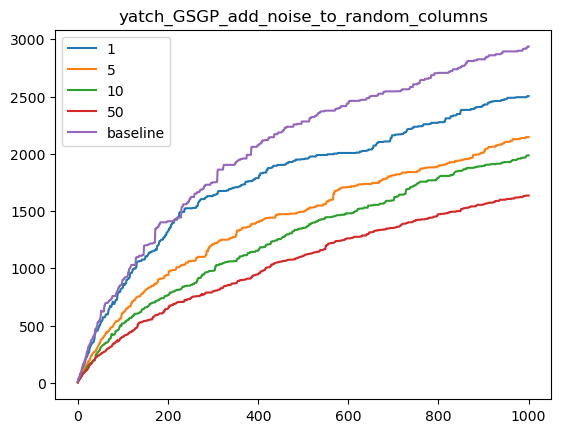

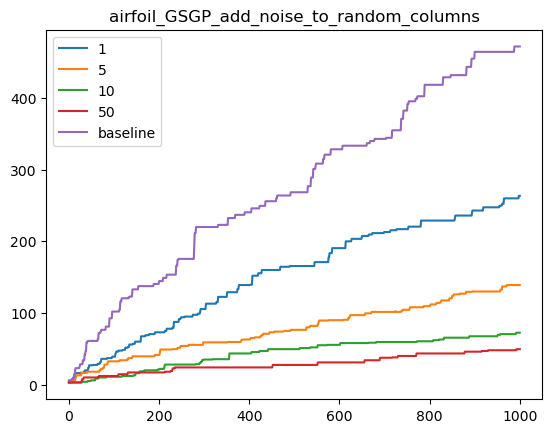

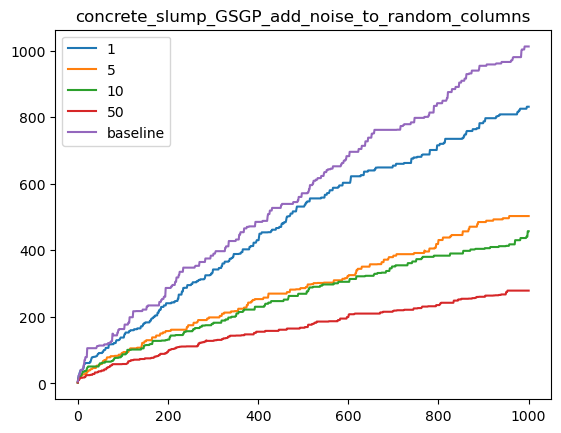

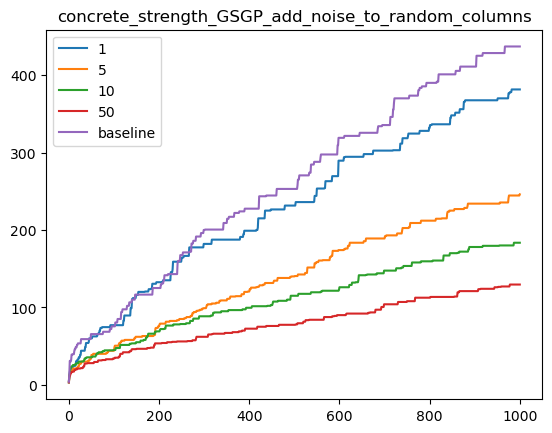

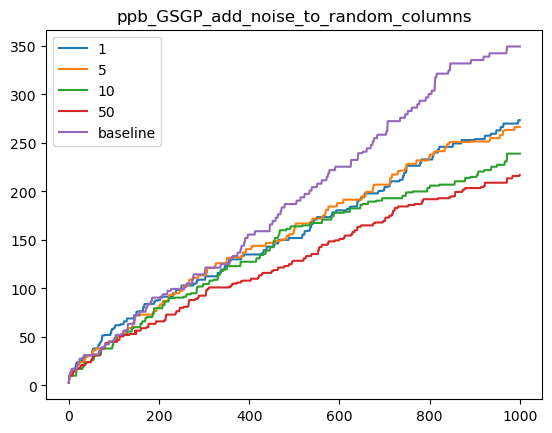

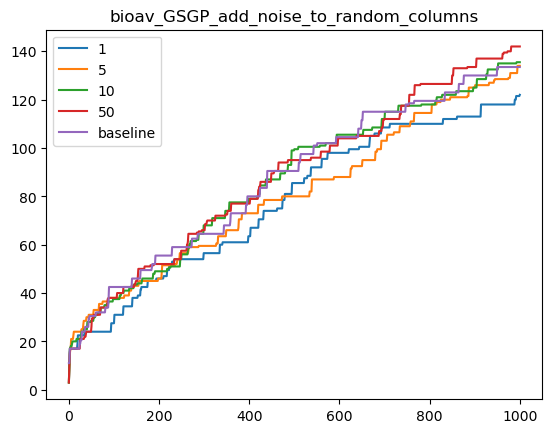

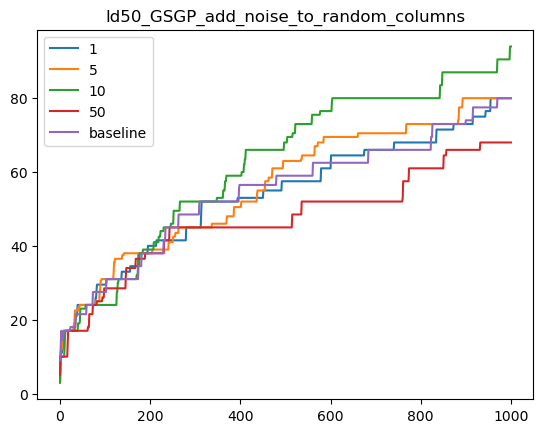

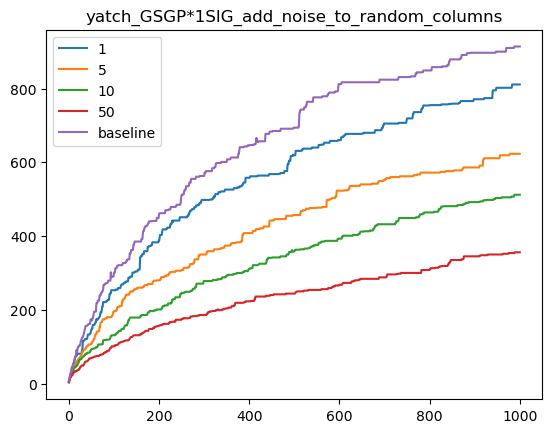

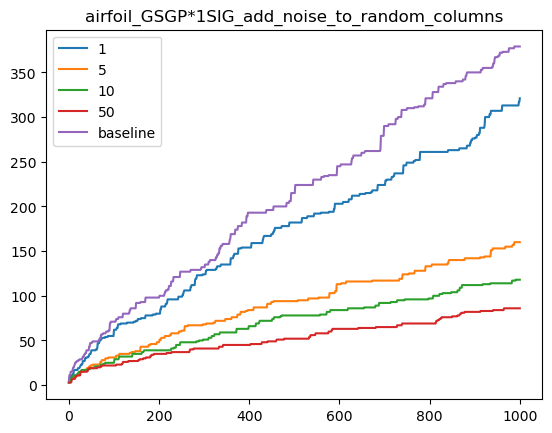

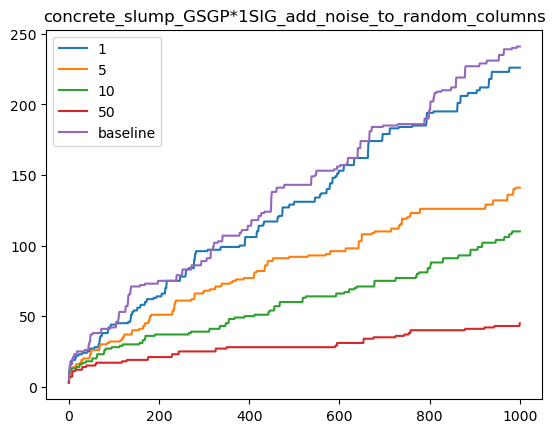

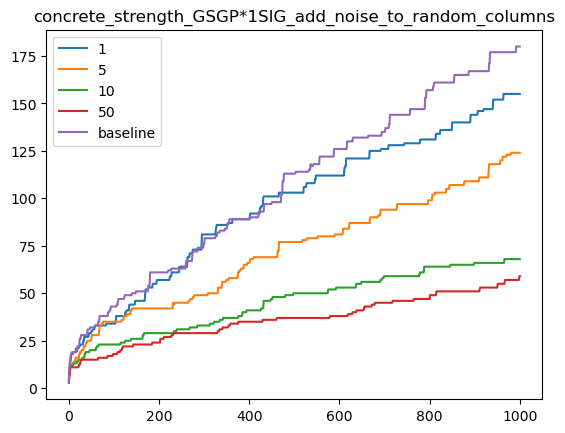

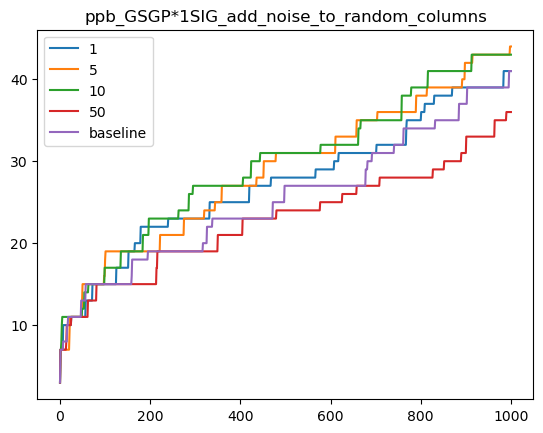

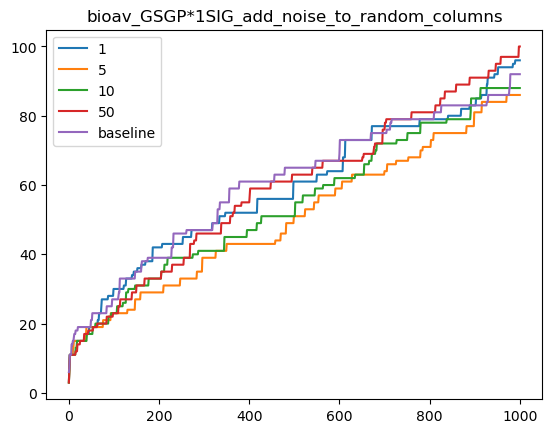

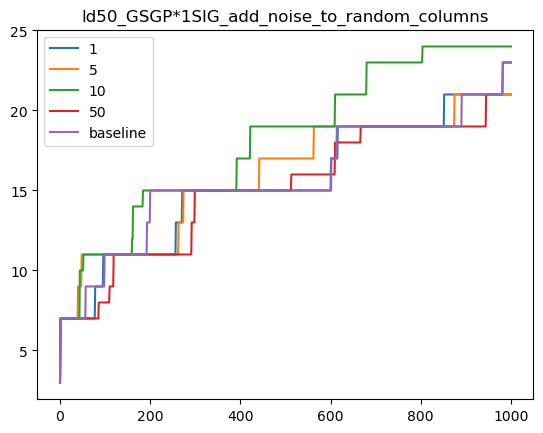

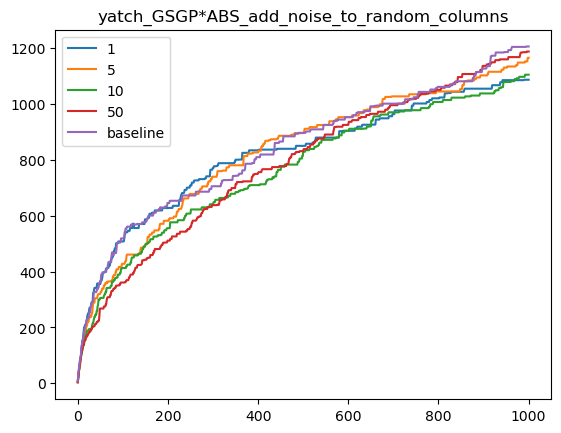

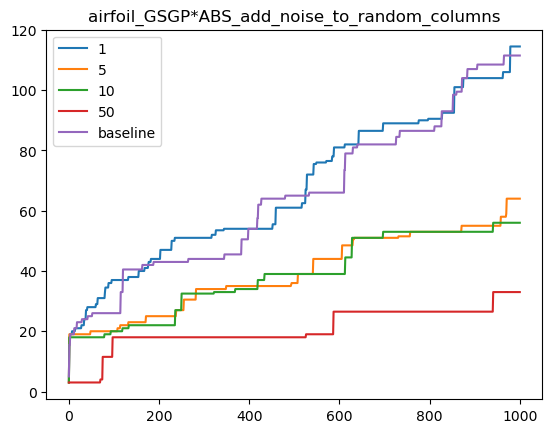

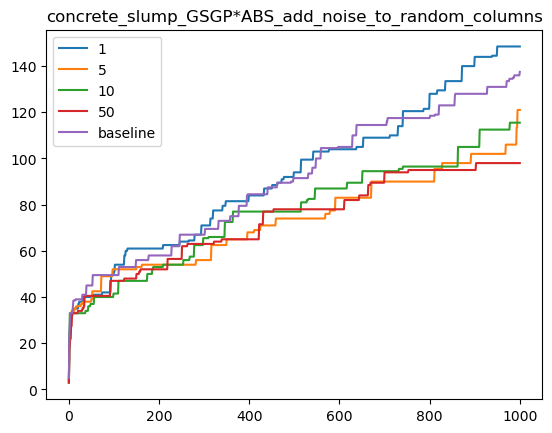

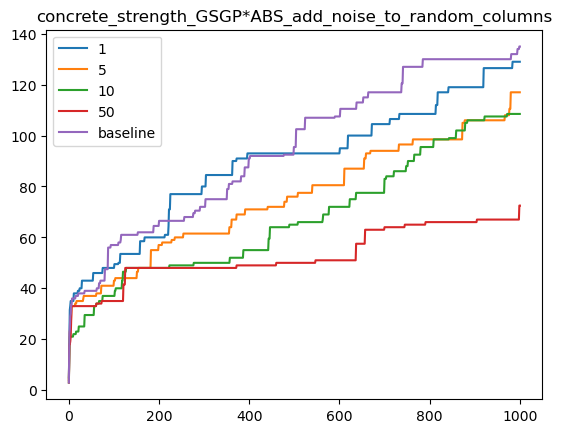

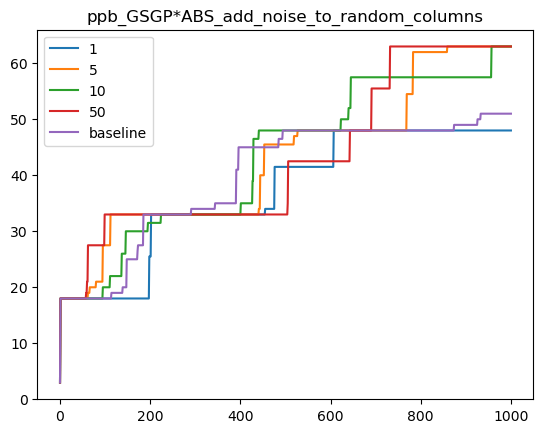

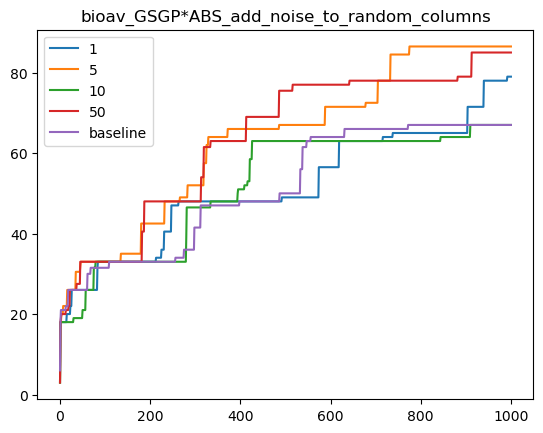

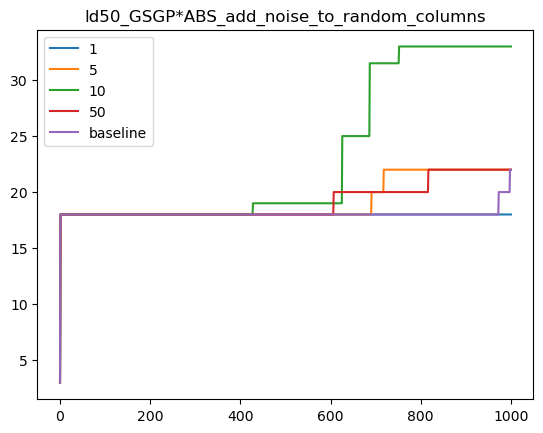

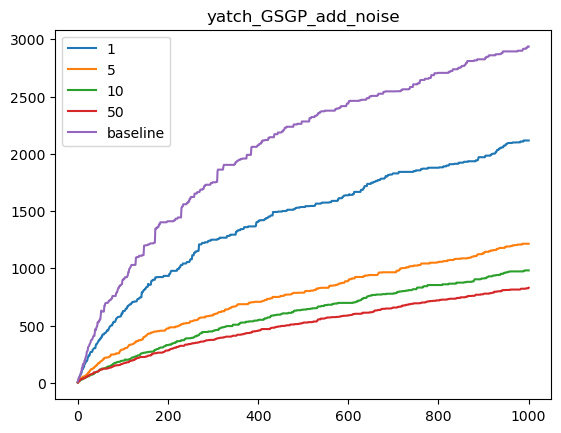

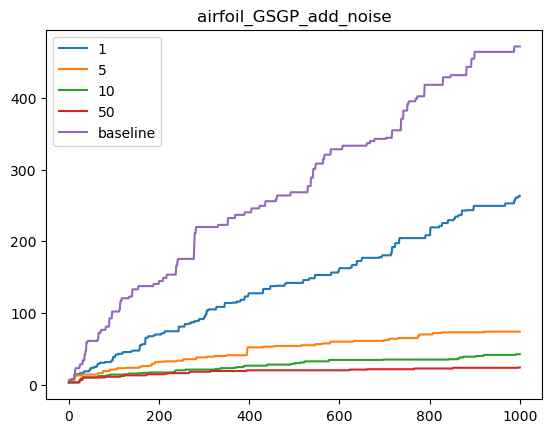

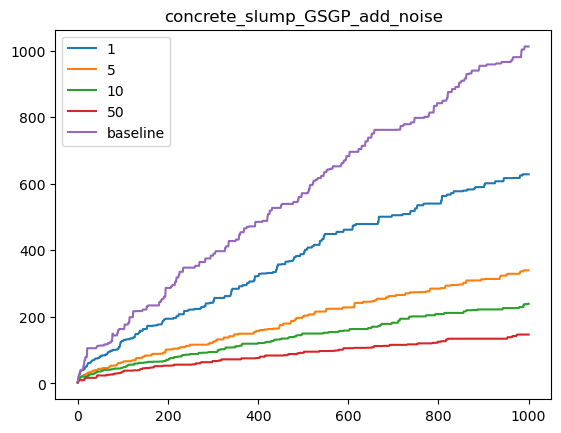

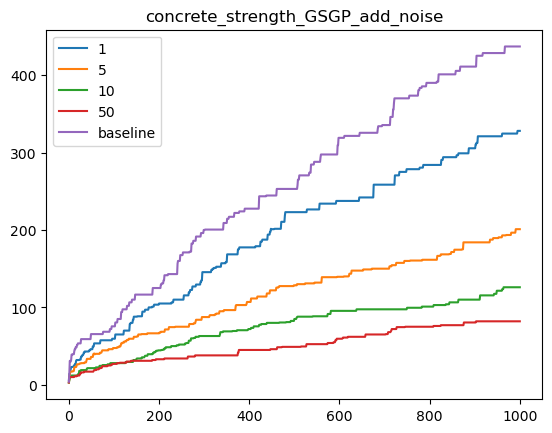

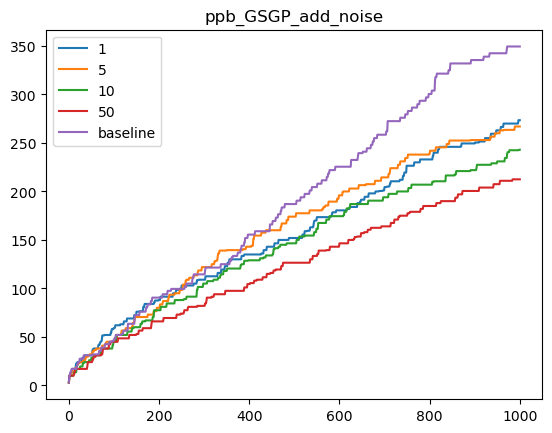

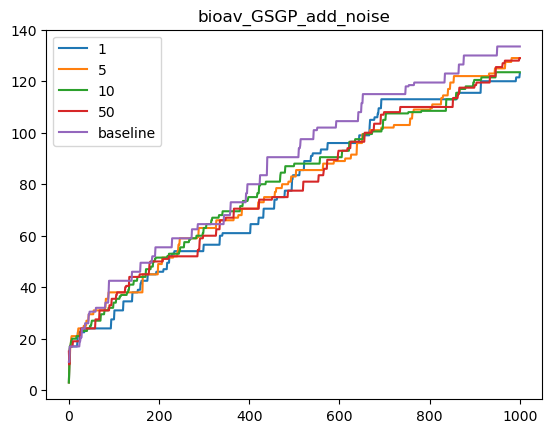

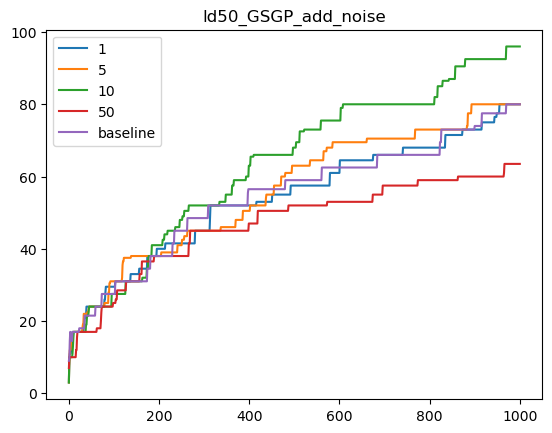

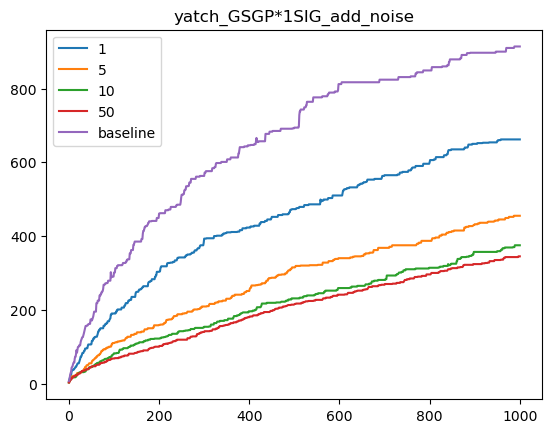

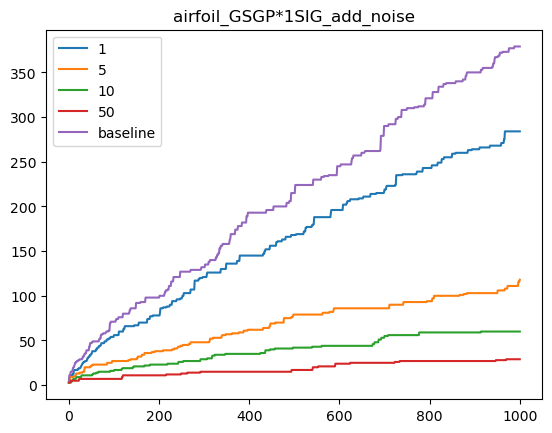

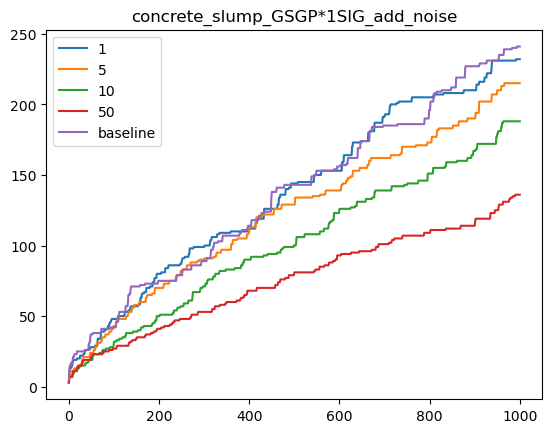

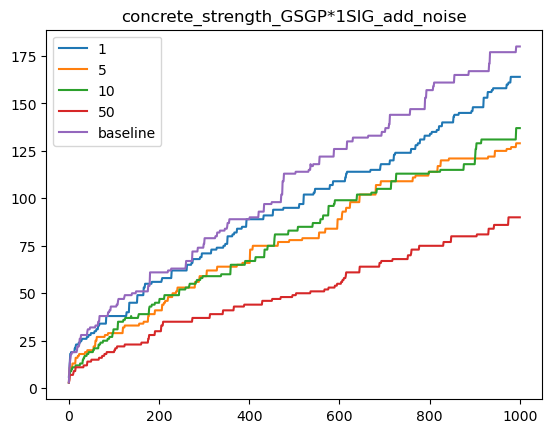

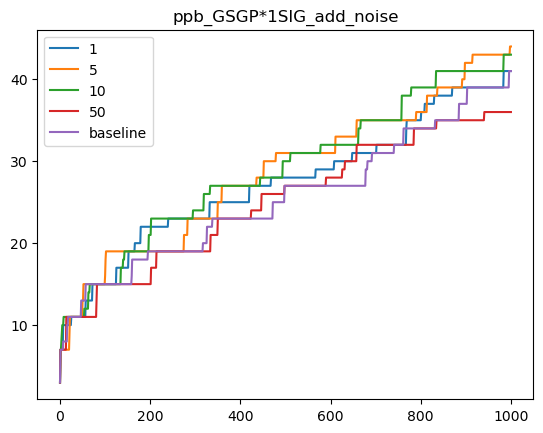

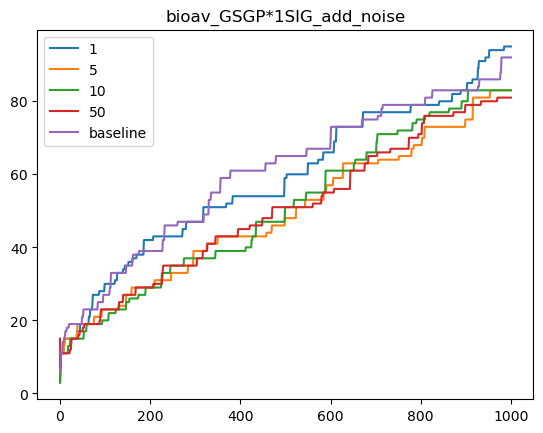

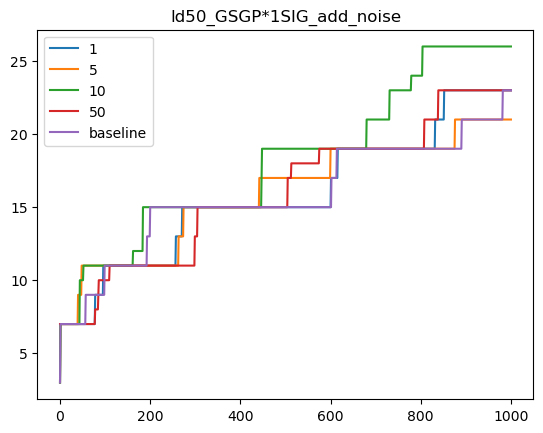

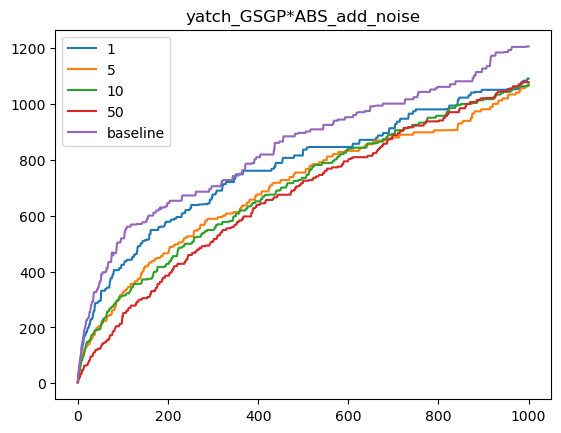

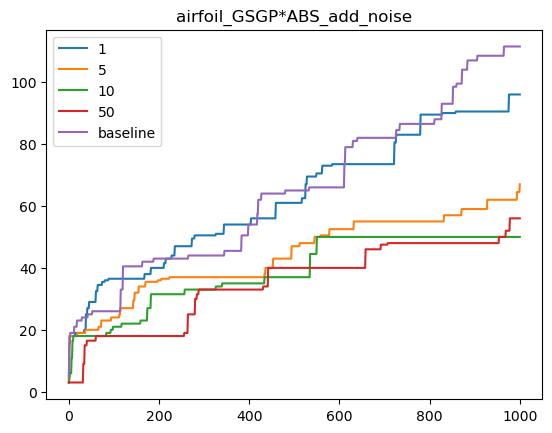

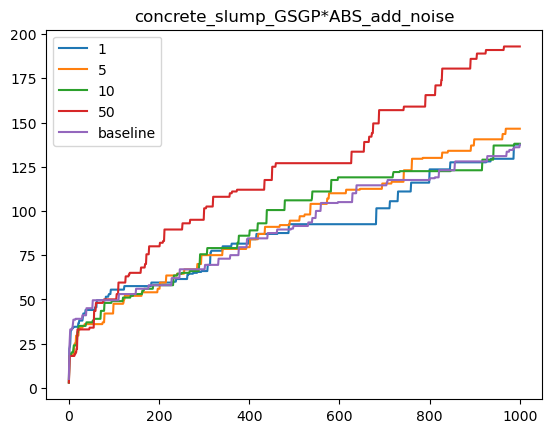

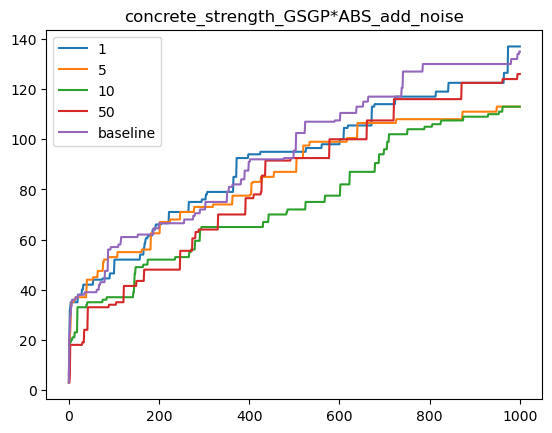

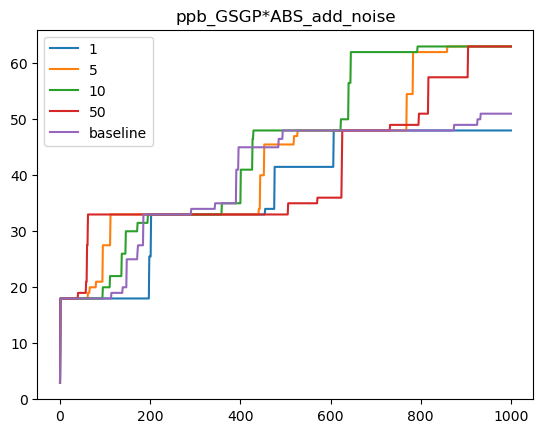

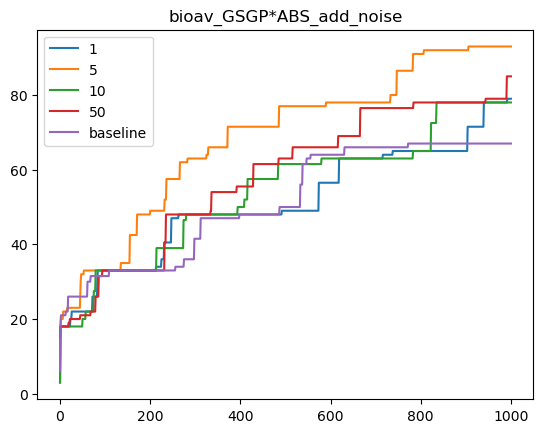

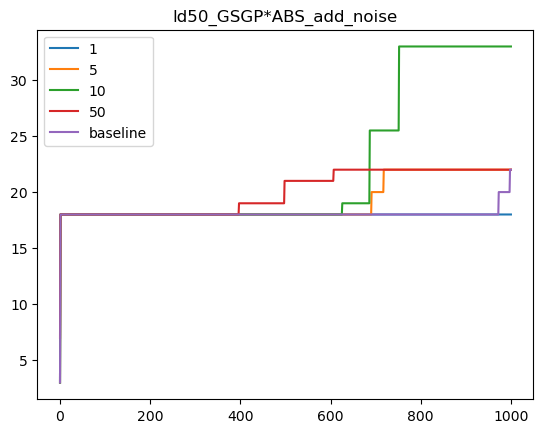

In [54]:
for experiment in data.experiment.unique():
    for algo in ['GSGP', 'GSGP*1SIG','GSGP*ABS']:
        for datas in data.dataset.unique(): 
            for noise in data.noise.unique():
                
                grouped = data.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
                plt.plot(grouped.index, grouped['elite_size'].values, label = noise)
    
            
            grouped = baseline.query("algo == @algo and dataset == @datas")[["generation", "test_fitness", "elite_size"]].groupby("generation").median()
            plt.plot(grouped.index, grouped['elite_size'].values, label = 'baseline')
    
            plt.title(f'{datas}_{algo}_{experiment}')
            plt.legend()
            plt.show()

In [40]:
counts = pd.read_csv('../main/log/_20241018.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [41]:
counts2 = pd.read_csv('../main/log/_20241028.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})
counts2 = counts2.query("experiment_id == '4b572b24-9500-11ef-8b35-72c976fed59c'")

In [42]:
counts3 = pd.read_csv('../main/log/_20241112.csv', names = ["algo", "experiment_id", "noise", "dataset", "counts_v", "experiment"], converters={'counts_v': lambda x: x[1:-1].split(',')})

In [43]:
counts = pd.concat((counts, counts2))
counts = pd.concat((counts, counts3))

In [44]:
counts["count_v"] = counts.counts_v.apply(lambda x: sum([int(el) for el in x]))

In [45]:
counts.head()

algo                         experiment_id  noise dataset counts_v  \
0  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [1]   
1  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [3]   
2  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch     [10]   
3  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [5]   
4  SLIM*1SIG  201a8eee-8d56-11ef-bfc1-72c976fed59c      1   yatch      [6]   

                    experiment  count_v  
0  add_noise_to_random_columns        1  
1  add_noise_to_random_columns        3  
2  add_noise_to_random_columns       10  
3  add_noise_to_random_columns        5  
4  add_noise_to_random_columns        6

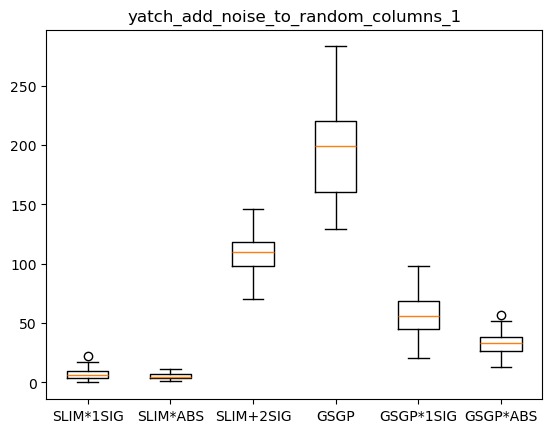

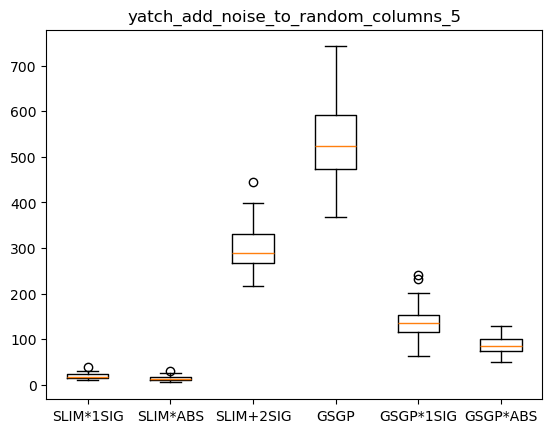

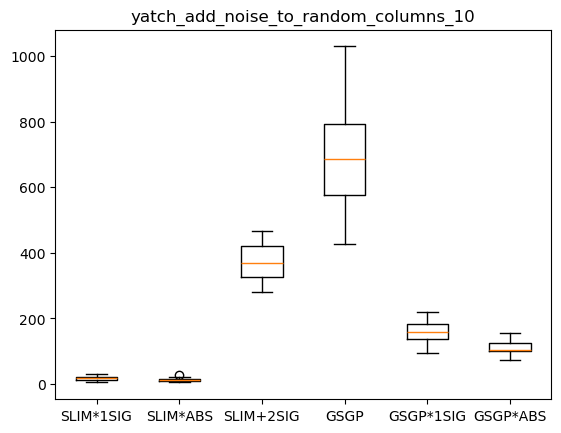

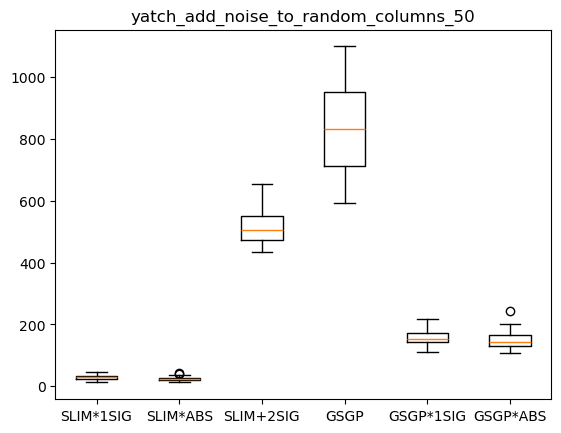

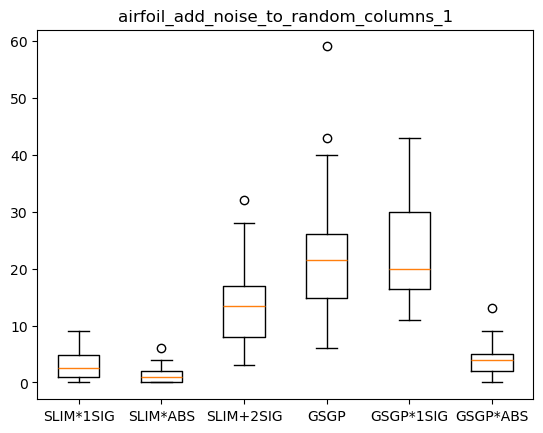

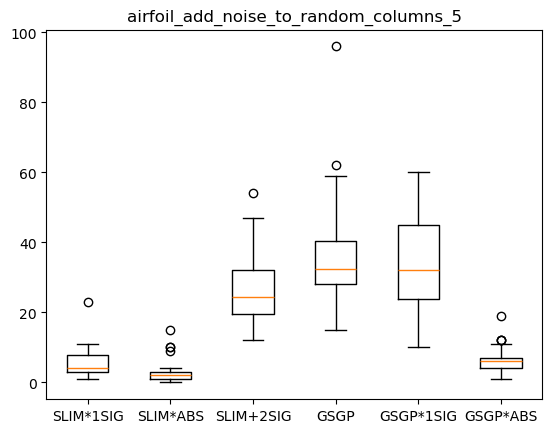

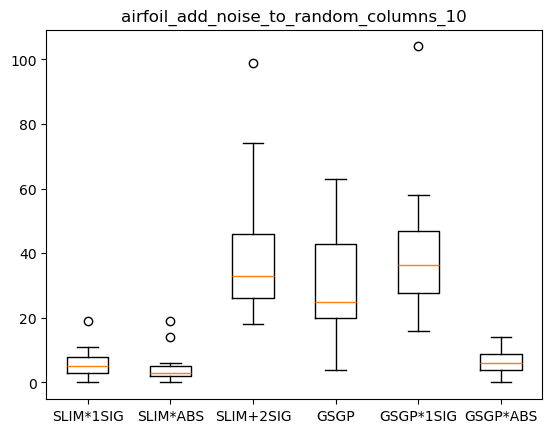

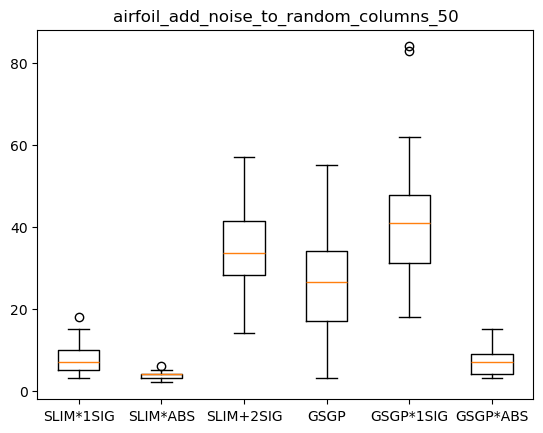

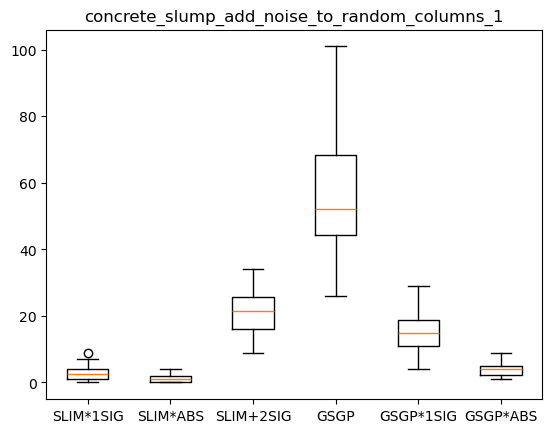

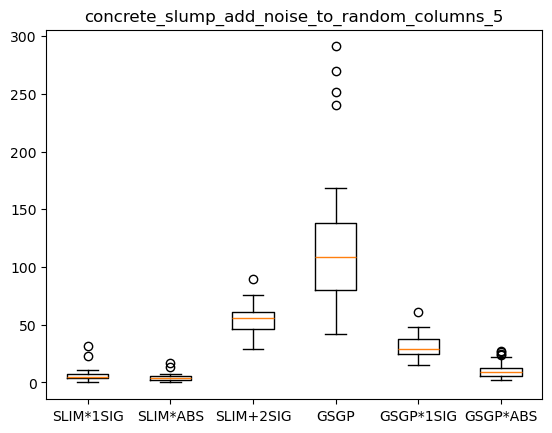

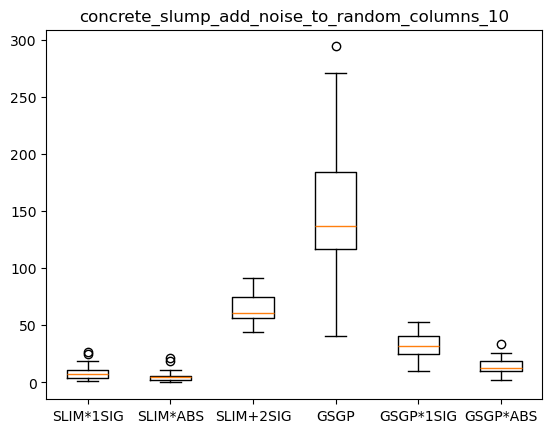

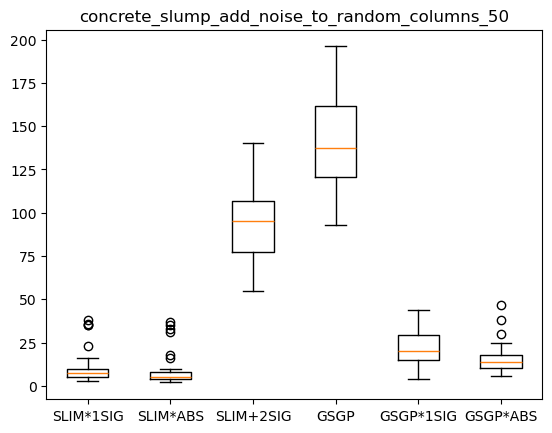

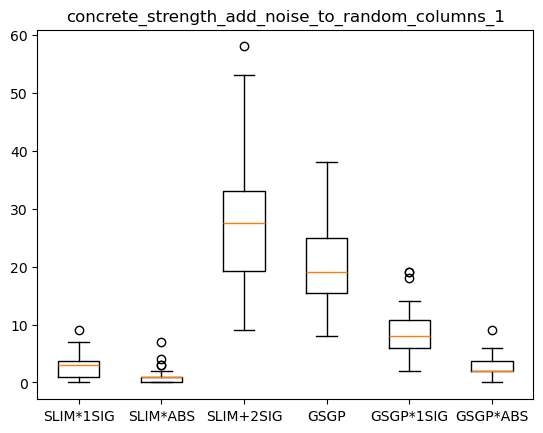

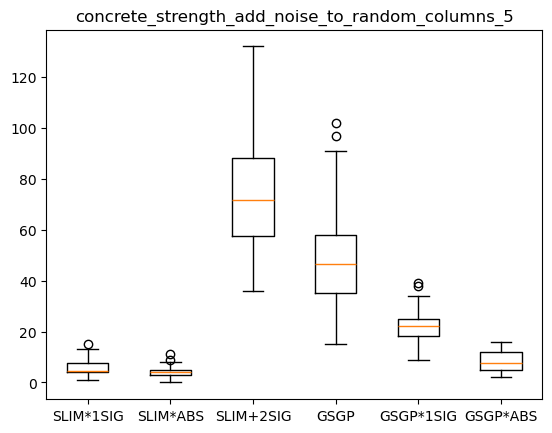

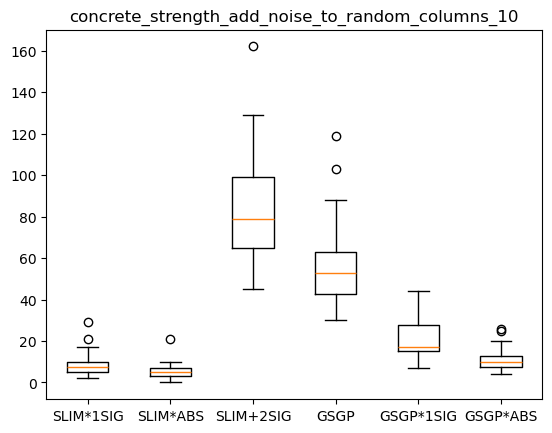

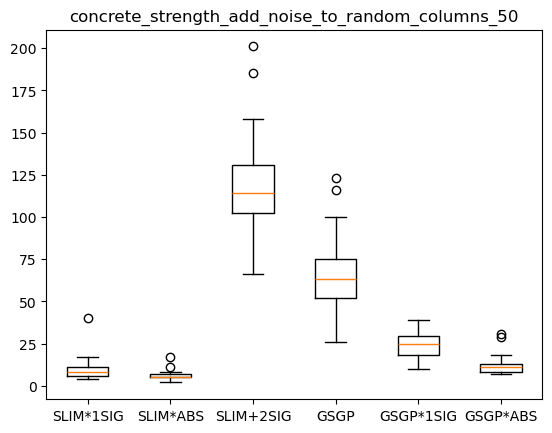

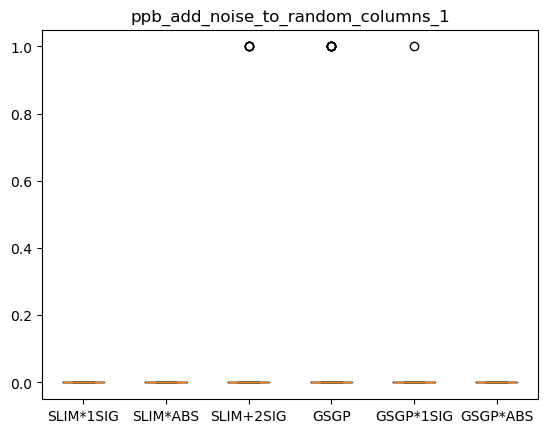

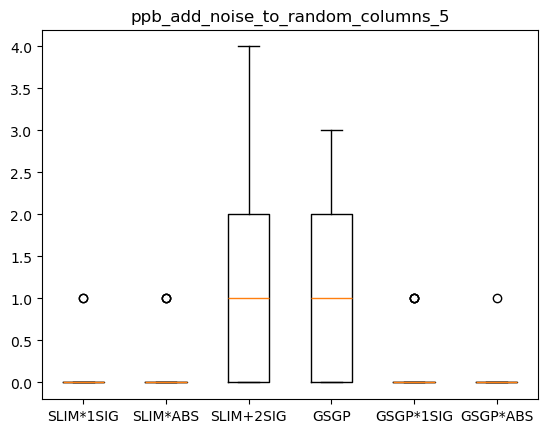

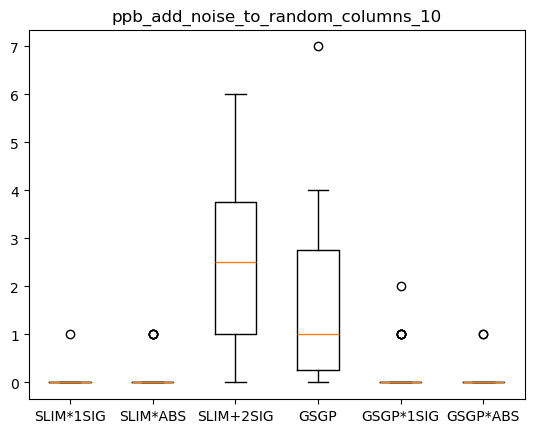

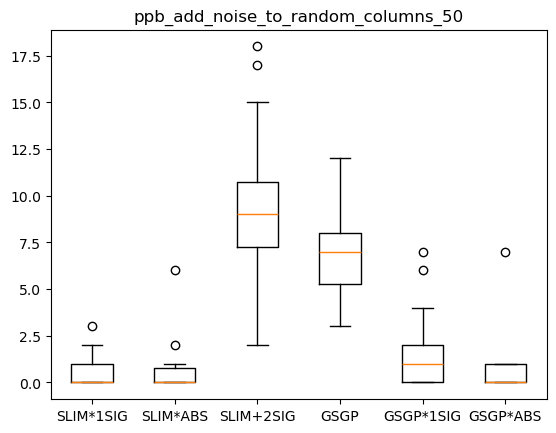

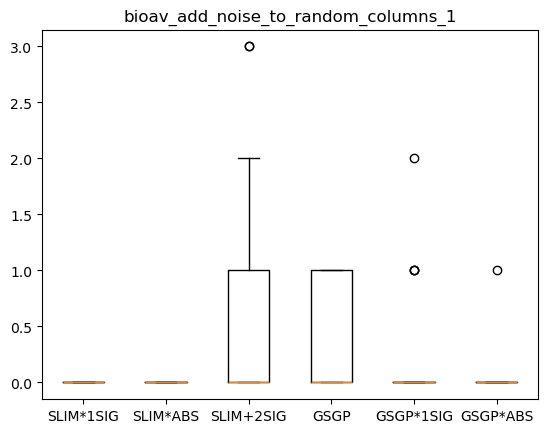

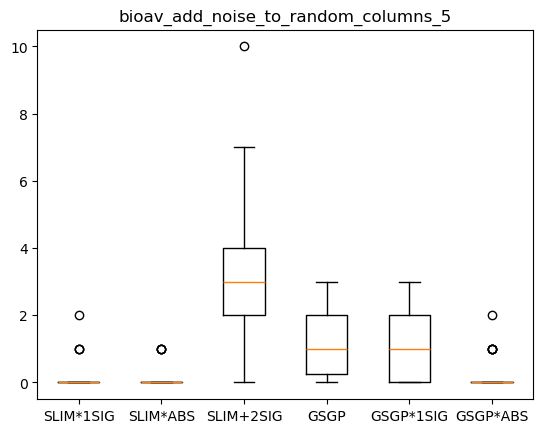

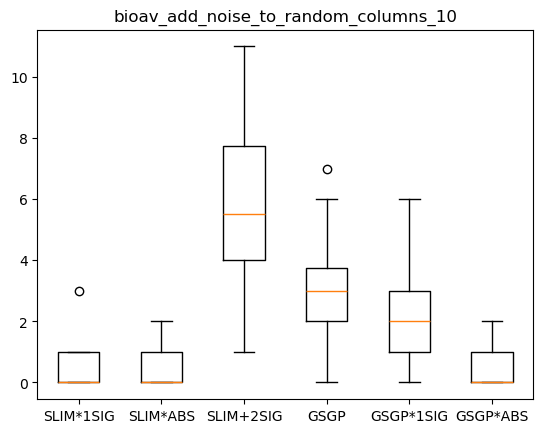

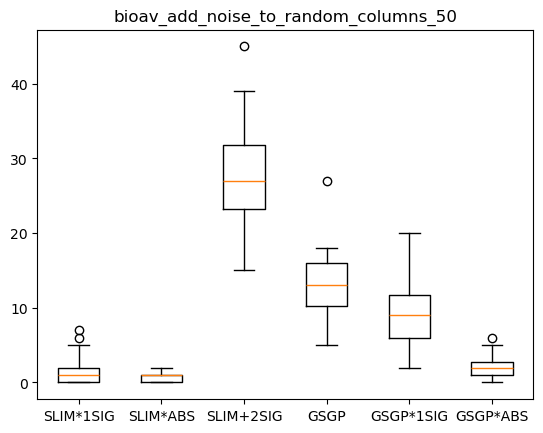

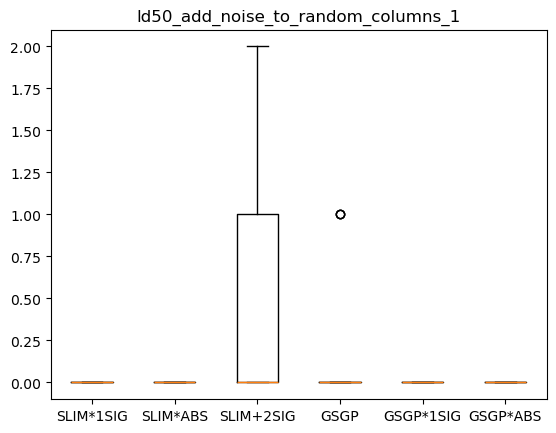

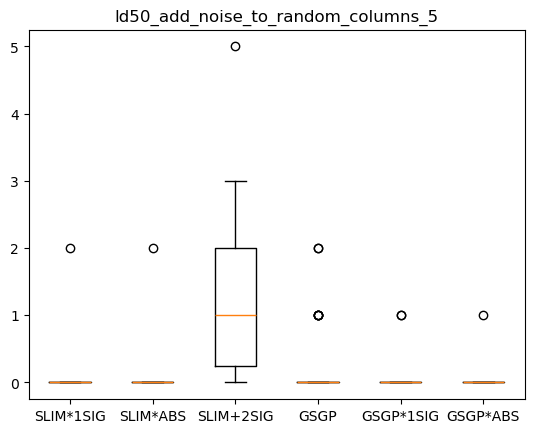

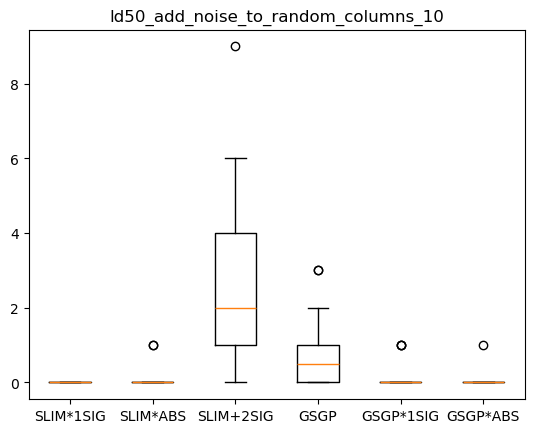

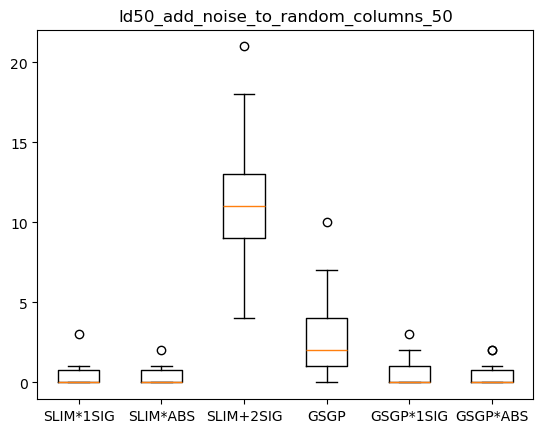

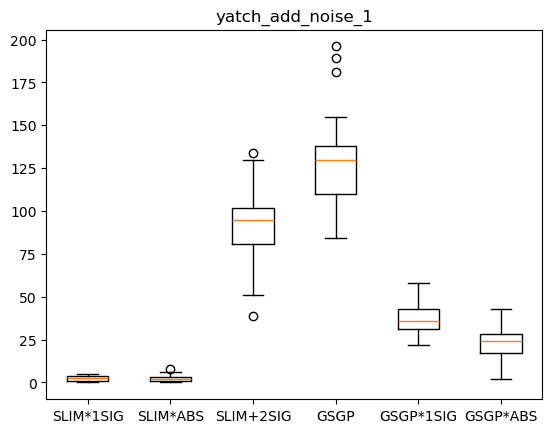

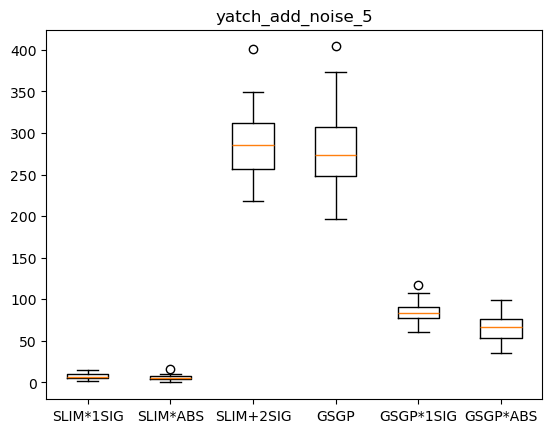

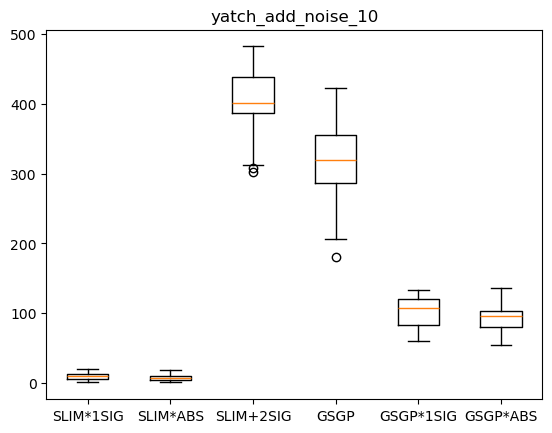

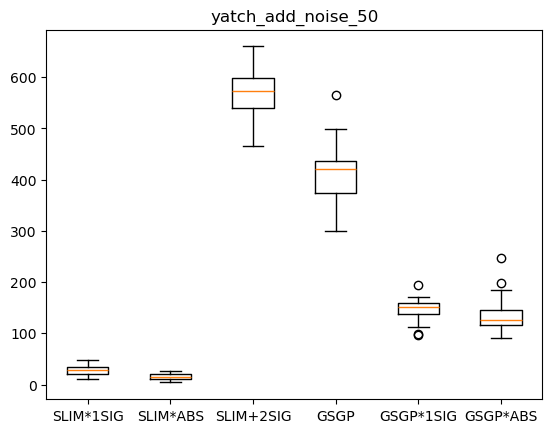

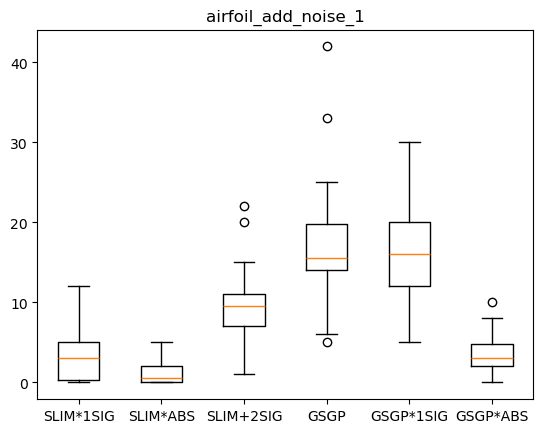

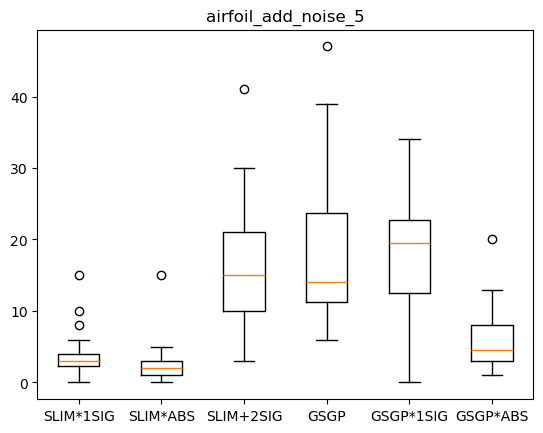

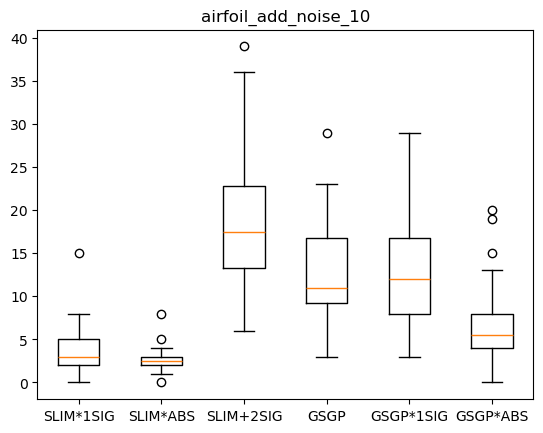

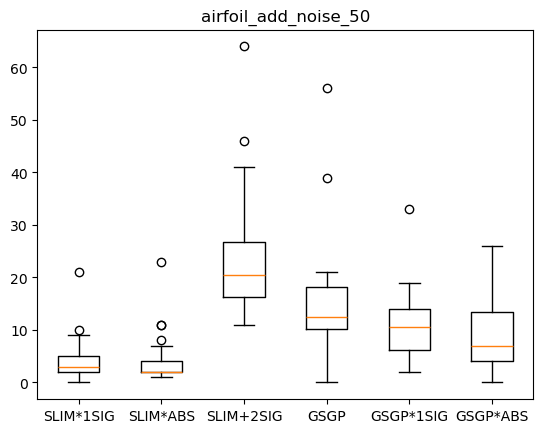

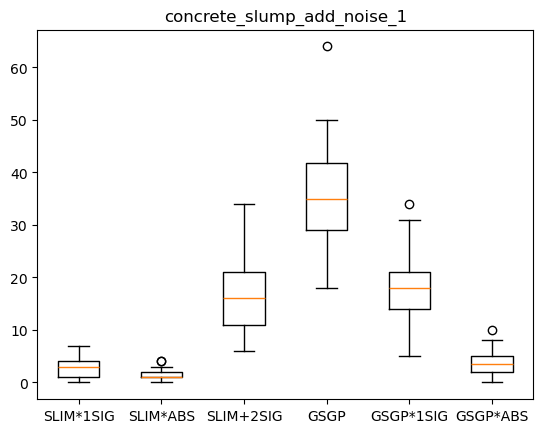

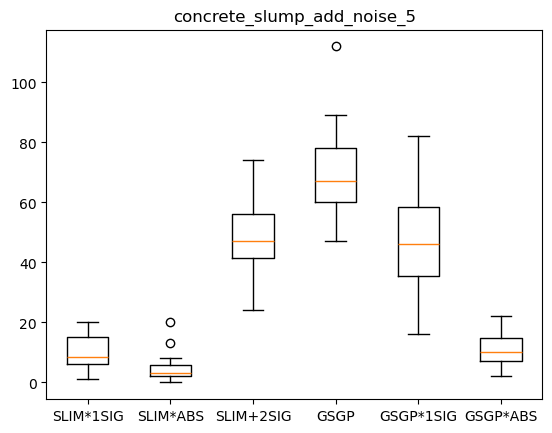

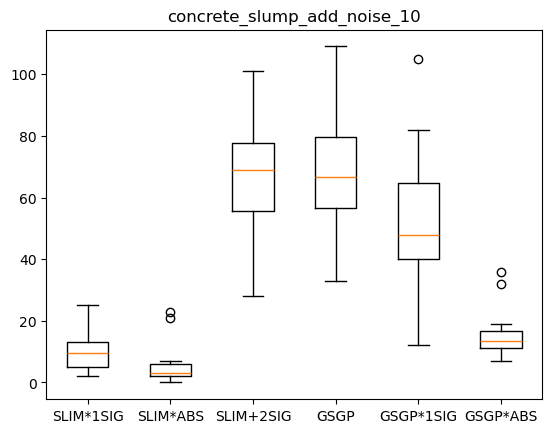

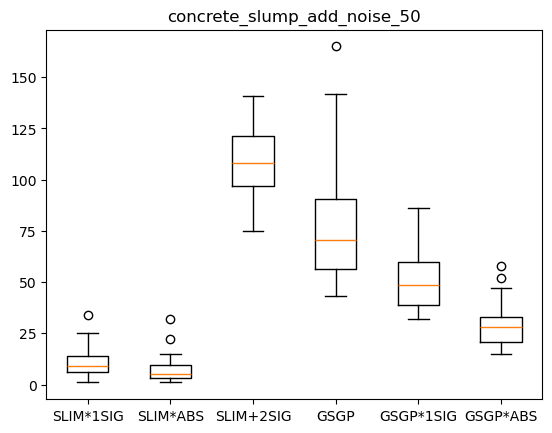

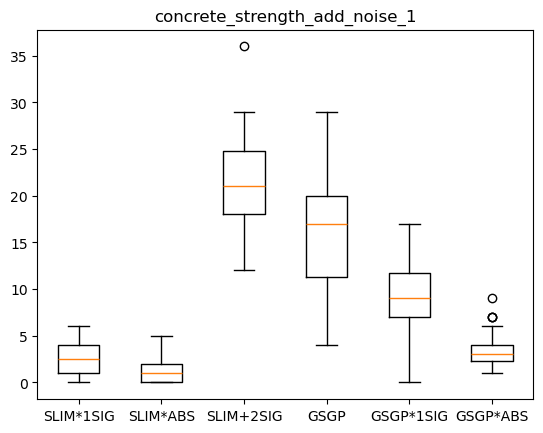

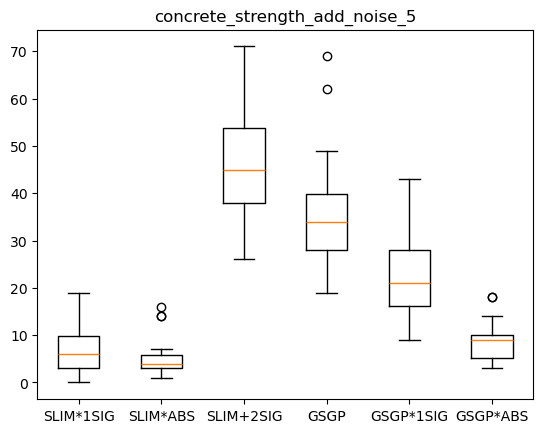

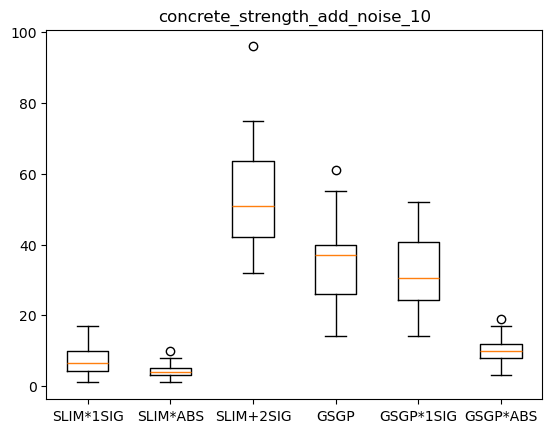

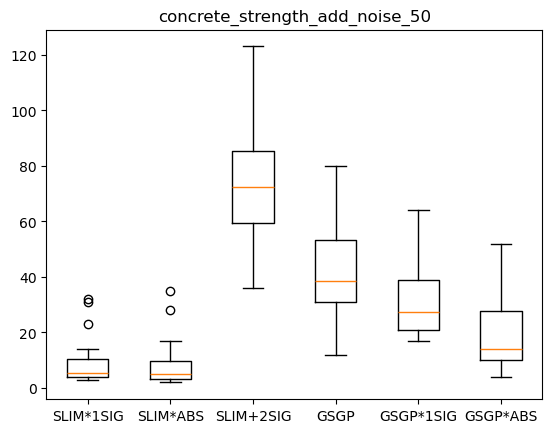

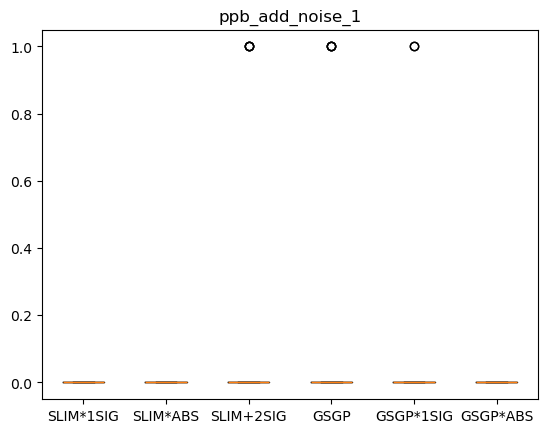

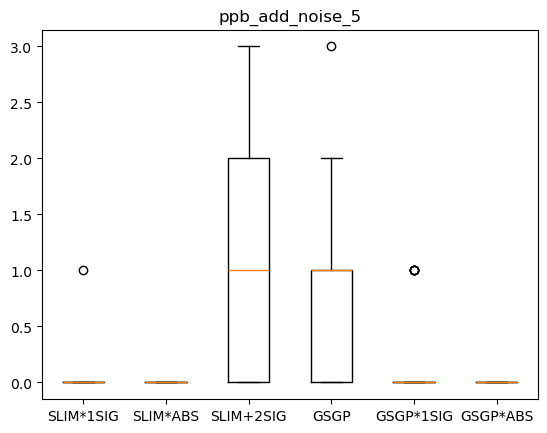

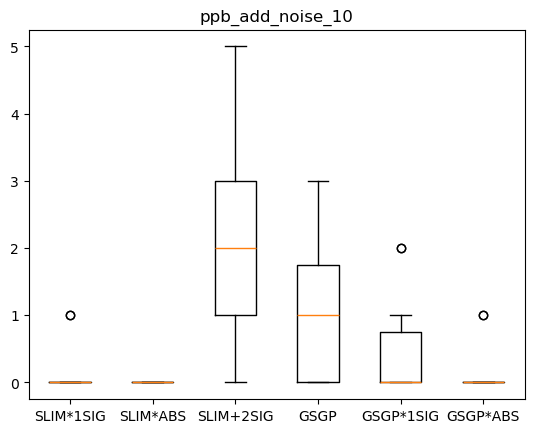

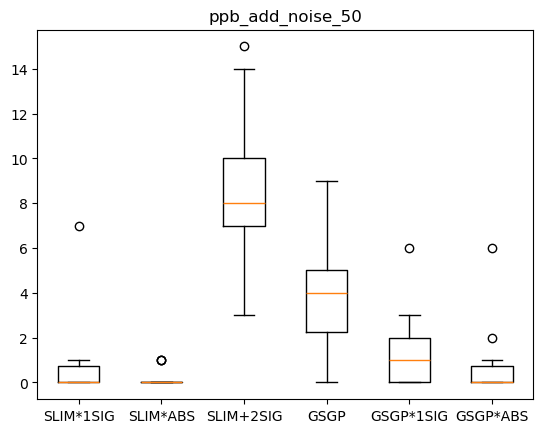

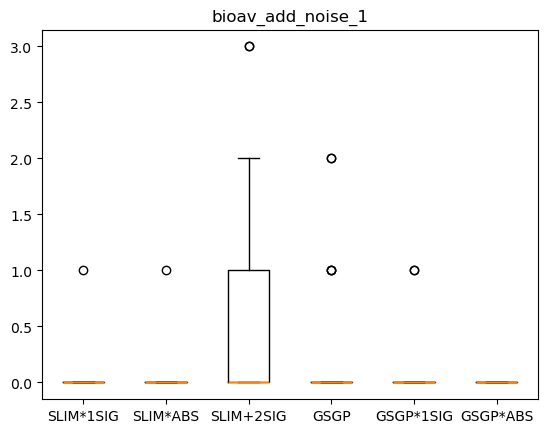

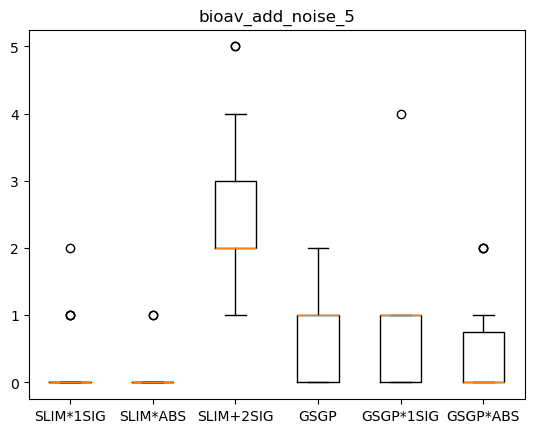

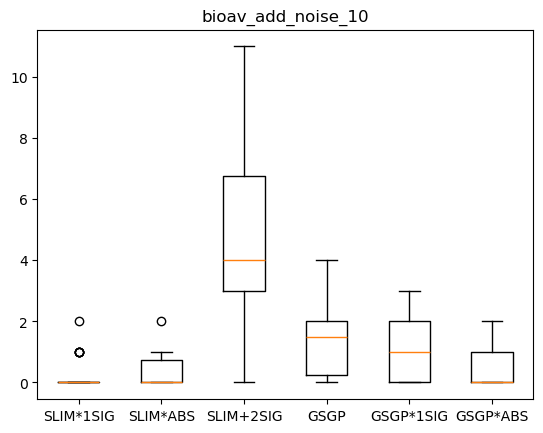

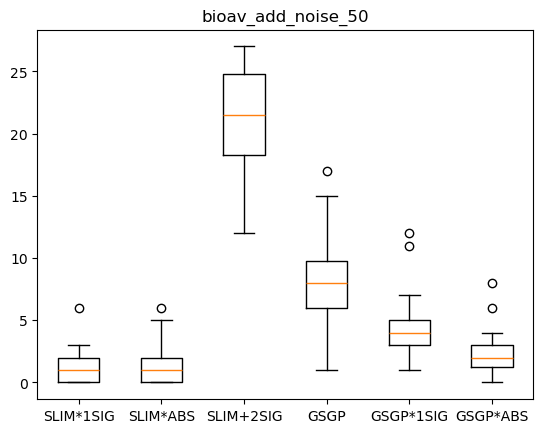

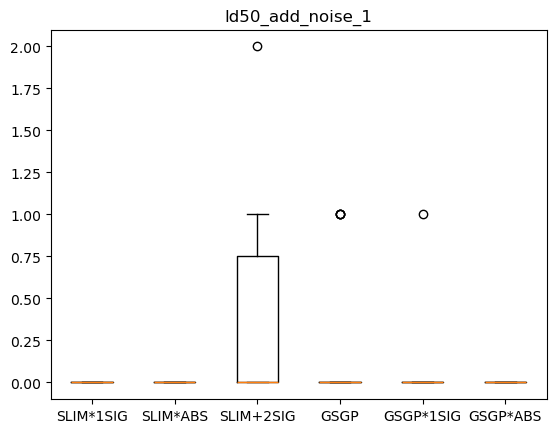

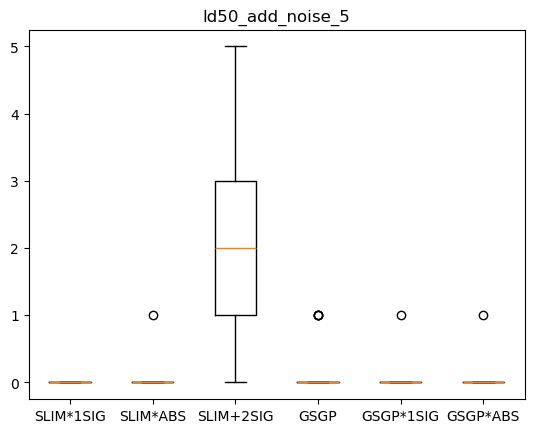

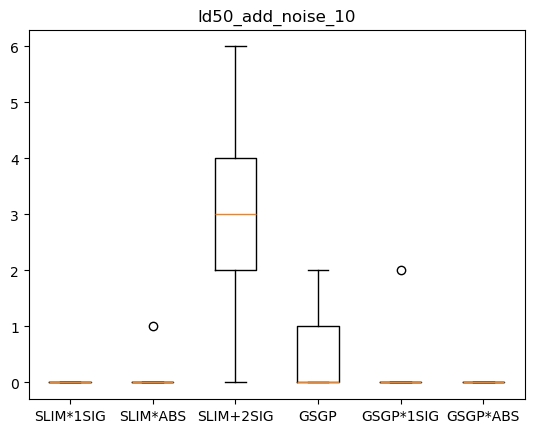

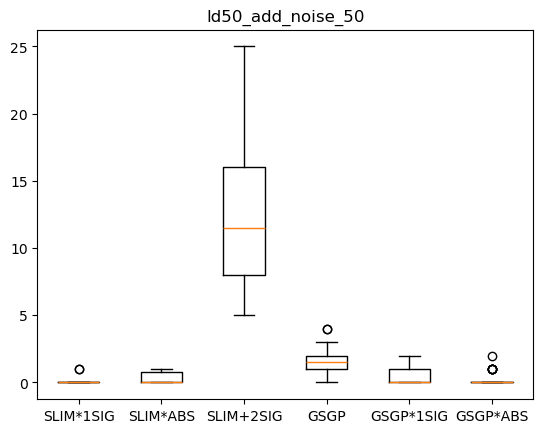

In [46]:
for experiment in counts.experiment.unique():
    for datas in counts.dataset.unique(): 
        for noise in counts.noise.unique():

            plt.boxplot([counts.query("algo == @algo and dataset == @datas and noise == @noise and experiment == @experiment")["count_v"].values.tolist() 
                        for algo in counts.algo.unique()], labels  = counts.algo.unique())


            plt.title(f'{datas}_{experiment}_{noise}')
            # plt.legend()
            plt.show()

In [68]:
grouped = counts[["experiment", "dataset",   "noise", "algo", "count_v"]].groupby(["experiment", "dataset",   "noise", "algo"]).median()

In [69]:
grouped

count_v
experiment                  dataset           noise algo              
add_noise                   airfoil           1     GSGP          14.0
                                                    SLIM*1SIG      1.5
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      7.0
                                              5     GSGP          13.5
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       2.5
                                                    SLIM+2SIG     18.5
                                              10    GSGP          15.0
                                                    SLIM*1SIG      3.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     17.5
                                              50    GSGP          11.5
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     23.0
                            bioav             1     GSGP           0.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      0.5
                                              5     GSGP           0.5
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      3.0
                                              10    GSGP           1.0
                                                    SLIM*1SIG      0.0
                                                    SLIM*ABS       0.0
                                                    SLIM+2SIG      4.5
                                              50    GSGP           8.0
                                                    SLIM*1SIG      0.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     22.0
                            concrete_slump    1     GSGP          38.0
                                                    SLIM*1SIG      3.5
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     12.0
                                              5     GSGP          67.0
                                                    SLIM*1SIG      8.0
                                                    SLIM*ABS       2.0
                                                    SLIM+2SIG     52.0
                                              10    GSGP          70.5
                                                    SLIM*1SIG     11.0
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG     69.5
                                              50    GSGP          68.0
                                                    SLIM*1SIG      8.5
                                                    SLIM*ABS       4.0
                                                    SLIM+2SIG    100.0
                            concrete_strength 1     GSGP          15.0
                                                    SLIM*1SIG      2.5
                                                    SLIM*ABS       1.0
                                                    SLIM+2SIG     23.0
                                              5     GSGP          33.0
                                                    SLIM*1SIG      4.0
                                                    SLIM*ABS       4.5
                